# Mentoria: "Detección de Objetos en Imágenes" de la Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus aplicaciones - Año: 2020.

## Grupo 2: 
 * Maria Florencia Caballero
 * Joel Vivas
 * Leonardo Rodriguez
 * Diego Gonzalez 

Mentora: Lucía Benitez.

# Desarrollo del trabajo correspondiente a la materia: "**Analisis y Curación de Datos**"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Mentoria')


In [ ]:
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import PIL
from PIL import Image
from os import path
from scipy import stats


from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_sets_path = "/content/drive/My Drive/Mentoria/muestra"
os.chdir('{}'.format(data_sets_path))

# Curación de Datos

In [ ]:
#nos posicionamos en la carpeta muestra:
os.chdir('/content/drive/My Drive/Mentoria/muestra')
! ls -d Dataset-*/

Dataset-M/  Dataset-N/	Dataset-T/


In [ ]:
#leemos el archivo de la tabla:
csv_wlabels_df = pd.read_csv('csv_wlabels_muestra_modificado_df.csv', index_col=0)
print(csv_wlabels_df.shape)
csv_wlabels_df.head()

(1728, 2061)


filename  xmin  ...      2046      2047
0    M_G_Mostrando_Amarillos_0_double_box1.jpg   218  ...  0.078312  0.421612
1    M_G_Mostrando_Amarillos_0_double_box2.jpg   617  ...  0.052072  0.213453
2  M_G_Mostrando_Amarillos_105_double_box1.jpg   875  ...  0.080831  0.005678
3  M_G_Mostrando_Amarillos_105_double_box2.jpg   502  ...  0.012721  0.091329
4  M_G_Mostrando_Amarillos_114_double_box1.jpg   916  ...  0.217550  0.240535

[5 rows x 2061 columns]

### Chequeando los tipos de datos.


In [ ]:
csv_wlabels_df.dtypes

filename     object
xmin          int64
xmax          int64
ymin          int64
ymax          int64
             ...   
2043        float64
2044        float64
2045        float64
2046        float64
2047        float64
Length: 2061, dtype: object

In [ ]:
csv_wlabels_df.describe()

xmin         xmax  ...         2046         2047
count  1728.000000  1728.000000  ...  1728.000000  1728.000000
mean    908.942130  1034.466435  ...     0.291399     0.164628
std     273.965277   256.509204  ...     0.357829     0.181087
min       3.000000   312.000000  ...     0.000000     0.000000
25%     763.000000   882.000000  ...     0.074389     0.027707
50%     922.500000  1033.500000  ...     0.169340     0.105575
75%    1086.000000  1209.000000  ...     0.358438     0.245164
max    1742.000000  1831.000000  ...     2.832241     1.535473

[8 rows x 2055 columns]

In [ ]:
csv_wlabels_df.describe(include = 'object')

filename  Time  ... guantes color
count                                      1728  1728  ...    1728  1649
unique                                     1668     3  ...       2     5
top     M_P_Trabajando_Manos_236_single_box.jpg     M  ...      si  mano
freq                                          3   687  ...    1010   632

[4 rows x 6 columns]

Podemos ver que los tipos de datos si corresponden a lo esperado. Los datos que aparecen como tipo object son los correspondientes a "filename", "Time", "Size", "Type", "guantes", "color" lo cual tiene sentido ya que son datos string.
Por otro lado los datos numericos estan bien leidos como enteros o flotantes.

### Muestras aleatorias de la tabla

In [ ]:
import numpy as np
np.random.seed(0)
csv_wlabels_df.sample(10)

filename  xmin  ...      2046      2047
1318    M_G_Trabajando_Verdes_145_double_box1.jpg   556  ...  0.385579  0.270151
124    M_P_Mostrando_Amarillos_80_double_box2.jpg   602  ...  0.001926  0.000000
648   N_P_Mostrando_Mano-Verde_54_double_box1.jpg   903  ...  1.078492  0.028452
249   N_G_Trabajando_Amarillos_80_double_box2.jpg   544  ...  0.460349  0.137015
1599      T_P_Mostrando_Verdes_100_single_box.jpg  1618  ...  0.204869  0.000000
1643     T_P_Trabajando_Verdes_160_single_box.jpg  1244  ...  0.055121  0.430881
783       M_G_Mostrando_Manos_159_double_box1.jpg  1107  ...  0.210346  0.114169
1364     M_P_Mostrando_Verdes_121_double_box2.jpg  1152  ...  0.199715  0.023994
1228     T_P_Trabajando_Manos_150_double_box1.jpg  1275  ...  0.014782  0.060222
985       N_G_Trabajando_Manos_181_single_box.jpg   966  ...  0.084364  0.345547

[10 rows x 2061 columns]

### Encoding del archivo y valores inválidos.

Usando la librería *chardet* pudimos detectar el encoding del archivo, que es "utf-8", lo que indica que hay caracteres no ascii presentes. Comentamos el código puesto que la detección es lenta.

In [ ]:
#import chardet
# SLOW!
#with open("csv_wlabels_muestra_modificado_df.csv", 'rb') as rawdata:
#    result = chardet.detect(rawdata.read())
#result

Buscamos valores que que contienen caracteres no ascii:

In [ ]:
 def has_encoding(val, encoding='ascii'):
  try:
    if isinstance(val, float):
        return True
    val.encode(encoding)
    return True
  except UnicodeEncodeError:
    return False

suspected_columns = ["filename", "Time", "Size", "Type", "guantes", "color"]
ds = csv_wlabels_df.copy()[suspected_columns]
for col in suspected_columns:
  new_col = col + "_is_ok"
  ds[new_col] = ds[col].apply(lambda v: has_encoding(v))
ds_list = []
for col in suspected_columns:
  new_col = col + "_is_ok"
  temp = ds[suspected_columns][ds[new_col] == False]
  if len(temp) > 0:
    ds_list.append(temp)
suspicious_rows = pd.concat(ds_list, ignore_index=True)
suspicious_rows

filename Time Size   Type guantes  color
0    N_G_Mostrando_Manos_50_double_box1.jpg    N    G  train      no  MaÑ_o
1    N_G_Mostrando_Manos_50_double_box2.jpg    N    G  train      no  MaÑ_o
2      N_G_Mostrando_Manos_5_single_box.jpg    N    G  train      no  MaÑ_o
3    N_G_Mostrando_Manos_61_double_box1.jpg    N    G  train      no  MaÑ_o
4    N_G_Mostrando_Manos_61_double_box2.jpg    N    G  train      no  MaÑ_o
..                                      ...  ...  ...    ...     ...    ...
61  N_G_Trabajando_Manos_70_double_box2.jpg    N    G  train      no  MaÑ_o
62  N_G_Trabajando_Manos_80_double_box1.jpg    N    G  train      no  MaÑ_o
63  N_G_Trabajando_Manos_80_double_box2.jpg    N    G  train      no  MaÑ_o
64  N_G_Trabajando_Manos_90_double_box1.jpg    N    G  train      no  MaÑ_o
65  N_G_Trabajando_Manos_90_double_box2.jpg    N    G  train      no  MaÑ_o

[66 rows x 6 columns]

Vemos que "Ñ" es el único caracter no ascii presente, que está en la columna color.

Observamos que en la carpeta de imagenes, el nombre del archivo
tiene caracteres alfanuméricos, "." y "_".
Veamos con una expresión regular si hay imagenes cuyo nombre no cumplan con ese patrón. 

In [ ]:
import re
def get_suspicious_filenames(ds):
    wrong_files = []
    for file in ds["filename"]:
        if not re.match(r'[A-Za-z0-9_\.\-]+$', file):
            wrong_files.append(file)
    return pd.DataFrame(wrong_files)

get_suspicious_filenames(ds)


0
0          M_P_Monstrando/"_Yellows_0_single_box.jpg
1       M_P_Monstrando/"_Yellows_100_double_box1.jpg
2       M_P_Monstrando/"_Yellows_100_double_box2.jpg
3         M_P_Monstrando/"_Yellows_10_single_box.jpg
4       M_P_Monstrando/"_Yellows_110_double_box1.jpg
5       M_P_Monstrando/"_Yellows_110_double_box2.jpg
6       M_P_Monstrando/"_Yellows_120_double_box1.jpg
7       M_P_Monstrando/"_Yellows_120_double_box2.jpg
8        M_P_Monstrando/"_Yellows_130_single_box.jpg
9       M_P_Monstrando/"_Yellows_140_double_box1.jpg
10      M_P_Monstrando/"_Yellows_140_double_box2.jpg
11      M_P_Monstrando/"_Yellows_150_double_box1.jpg
12      M_P_Monstrando/"_Yellows_150_double_box2.jpg
13      M_P_Monstrando/"_Yellows_160_double_box1.jpg
14      M_P_Monstrando/"_Yellows_160_double_box2.jpg
15      M_P_Monstrando/"_Yellows_170_double_box1.jpg
16  N_P_qeep^~vorkingg_hand-green_10_double_box2.jpg
17  N_P_qeep^~vorkingg_hand-green_30_double_box1.jpg
18  N_P_qeep^~vorkingg_hand-green_40_double_box2.jpg
19  N_P_qeep^~vorkingg_hand-green_49_double_box1.jpg
20  N_P_qeep^~vorkingg_hand-green_58_double_box1.jpg
21   N_P_qeep^~vorkingg_hand-green_67_single_box.jpg

In [ ]:
csv_wlabels_df.groupby(['color'])['filename'].count()

color
Amarillo    459
MaÑ_o        66
VERDE        41
Verde       451
mano        632
Name: filename, dtype: int64

Observamos que hay categorias incorrectas en la columna de color. La categoria "MaÑ_o" aparentemente esta mal codificada y corresponderia en realidad a la palabra "mano". Ademas la categoria "VERDE" esta mal escrita con mayuscula y considerada como una categoria diferente a la de "Verde" (que seria la correcta).

Verificamos consistencia de la columna color respecto a la columna guante

In [ ]:
no_Amarillo = csv_wlabels_df[(csv_wlabels_df.guantes == 'no')&(csv_wlabels_df.color == 'Amarillo')]
no_Amarillo

filename  xmin  ...      2046      2047
3   M_G_Mostrando_Amarillos_105_double_box2.jpg   502  ...  0.012721  0.091329
4   M_G_Mostrando_Amarillos_114_double_box1.jpg   916  ...  0.217550  0.240535
5   M_G_Mostrando_Amarillos_114_double_box2.jpg   599  ...  0.090786  0.062031
6   M_G_Mostrando_Amarillos_123_double_box1.jpg   319  ...  0.026467  0.269588
7   M_G_Mostrando_Amarillos_123_double_box2.jpg  1185  ...  0.071413  0.149132
8    M_G_Mostrando_Amarillos_12_double_box1.jpg   336  ...  0.105960  0.327883
9    M_G_Mostrando_Amarillos_12_double_box2.jpg   505  ...  0.124739  0.159396
10  M_G_Mostrando_Amarillos_130_double_box1.jpg   962  ...  0.076352  0.382027
11  M_G_Mostrando_Amarillos_130_double_box2.jpg   377  ...  0.052933  0.022930
12  M_G_Mostrando_Amarillos_132_double_box1.jpg   398  ...  0.699427  0.011071
13  M_G_Mostrando_Amarillos_132_double_box2.jpg   883  ...  0.081277  0.236350
14  M_G_Mostrando_Amarillos_144_double_box1.jpg  1053  ...  0.161349  0.173940
15  M_G_Mostrando_Amarillos_144_double_box2.jpg     3  ...  0.279368  0.286251
16  M_G_Mostrando_Amarillos_153_double_box1.jpg  1284  ...  0.036646  0.279414
17  M_G_Mostrando_Amarillos_153_double_box2.jpg   318  ...  0.148457  0.185744
18  M_G_Mostrando_Amarillos_164_double_box1.jpg   825  ...  0.646611  0.075621
19  M_G_Mostrando_Amarillos_164_double_box2.jpg   731  ...  0.111688  0.061348
20  M_G_Mostrando_Amarillos_175_double_box1.jpg   709  ...  0.111037  0.390392
21  M_G_Mostrando_Amarillos_175_double_box2.jpg   782  ...  0.595617  0.068609
22   M_G_Mostrando_Amarillos_186_single_box.jpg   407  ...  0.042803  0.254710
23   M_G_Mostrando_Amarillos_24_double_box1.jpg   687  ...  0.413832  0.587136
24   M_G_Mostrando_Amarillos_24_double_box2.jpg   424  ...  0.135747  0.067160
25   M_G_Mostrando_Amarillos_36_double_box1.jpg  1169  ...  0.727200  0.069888

[23 rows x 2061 columns]

In [ ]:
csv_wlabels_df[(csv_wlabels_df.guantes == 'no')&(csv_wlabels_df.color == 'Verde')]

Empty DataFrame
Columns: [filename, xmin, xmax, ymin, ymax, Time, Size, Type, Hand_Pixel_Width, Hand_Pixel_Height, Area, guantes, color, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, ...]
Index: []

[0 rows x 2061 columns]

In [ ]:
csv_wlabels_df[(csv_wlabels_df.guantes == 'si')&(csv_wlabels_df.color == 'mano')]

filename  xmin  ...      2046      2047
541  N_G_Mostrando_Mano-Amarillo_39_double_box1.jpg   516  ...  0.280039  0.171506
542  N_G_Mostrando_Mano-Amarillo_50_double_box1.jpg   425  ...  0.079302  0.345564
543  N_G_Mostrando_Mano-Amarillo_54_double_box1.jpg   423  ...  0.018331  0.415500

[3 rows x 2061 columns]

In [ ]:
csv_wlabels_df[(csv_wlabels_df.guantes == 'no')&(csv_wlabels_df.color == 'mano')]

filename  xmin  ...      2046      2047
514   M_G_Mostrando_Mano-Amarillo_0_double_box2.jpg   934  ...  0.453118  0.076733
515  M_G_Mostrando_Mano-Amarillo_11_double_box1.jpg  1063  ...  0.486870  0.324513
516  M_G_Mostrando_Mano-Amarillo_23_double_box2.jpg   787  ...  0.154935  0.515551
517  M_G_Mostrando_Mano-Amarillo_32_double_box2.jpg   859  ...  0.379225  0.195124
518  M_G_Mostrando_Mano-Amarillo_34_double_box2.jpg   861  ...  0.361596  0.188194
..                                              ...   ...  ...       ...       ...
55          M_P_Trabajando_Manos_236_single_box.jpg   945  ...  0.065588  0.014757
56          M_P_Trabajando_Manos_256_single_box.jpg   973  ...  0.807353  0.072692
57         M_P_Trabajando_Manos_276_double_box1.jpg   880  ...  0.133153  0.330550
58         M_P_Trabajando_Manos_276_double_box2.jpg  1030  ...  1.076789  0.000095
59          M_P_Trabajando_Manos_288_single_box.jpg   827  ...  0.015184  0.454819

[629 rows x 2061 columns]

Podemos ver que hay inconsistencias para las categorias "mano" y "Amarillo" ya que no tiene sentido que la categoria de guantes sea un no y la categoria color sea amarillo, o que la categoria de guantes sea un si y la categoria de color sea mano. Si la categoria en color es "mano" entonces no deberia tener guante y si la categoria es "Amarillo" entonces se supone que tiene guantes.

### Valores duplicados

Analizamos los valorees duplicados:

In [ ]:
duplicated = csv_wlabels_df[csv_wlabels_df.duplicated()]
duplicated

filename  xmin  ...      2046      2047
0     M_P_Mostrando_Manos_53_double_box2.jpg   873  ...  0.040546  0.050405
1     M_P_Mostrando_Manos_65_double_box1.jpg   675  ...  0.294957  0.005391
2     M_P_Mostrando_Manos_65_double_box2.jpg   958  ...  0.044207  0.131822
3     M_P_Mostrando_Manos_76_double_box1.jpg   610  ...  0.816142  0.155713
4     M_P_Mostrando_Manos_76_double_box2.jpg   668  ...  1.289974  0.021702
5      M_P_Mostrando_Manos_88_single_box.jpg   608  ...  0.177713  0.017627
6     M_P_Mostrando_Manos_99_double_box1.jpg   694  ...  2.271889  0.063924
7     M_P_Mostrando_Manos_99_double_box2.jpg  1093  ...  0.853309  0.184784
8      M_P_Mostrando_Manos_9_double_box1.jpg   293  ...  0.078561  0.422580
9      M_P_Mostrando_Manos_9_double_box2.jpg   825  ...  0.041159  0.150908
10     M_P_Trabajando_Manos_0_single_box.jpg   289  ...  0.364823  0.246557
11  M_P_Trabajando_Manos_114_double_box1.jpg   865  ...  0.267653  0.115396
12  M_P_Trabajando_Manos_114_double_box2.jpg   901  ...  0.126942  0.136278
13  M_P_Trabajando_Manos_138_double_box1.jpg   763  ...  0.160575  0.040610
14  M_P_Trabajando_Manos_138_double_box2.jpg   821  ...  0.374206  0.020846
15  M_P_Trabajando_Manos_140_double_box1.jpg   810  ...  0.069773  0.022818
16  M_P_Trabajando_Manos_140_double_box2.jpg   858  ...  0.173712  0.078482
17  M_P_Trabajando_Manos_162_double_box1.jpg   790  ...  0.097598  0.027318
18  M_P_Trabajando_Manos_162_double_box2.jpg   848  ...  0.077677  0.004261
19   M_P_Trabajando_Manos_184_single_box.jpg   877  ...  0.207719  0.023569
20  M_P_Trabajando_Manos_202_double_box1.jpg   850  ...  0.128290  0.159890
21  M_P_Trabajando_Manos_202_double_box2.jpg   924  ...  0.030576  0.317515
22  M_P_Trabajando_Manos_218_double_box1.jpg   794  ...  0.048669  0.102600
23  M_P_Trabajando_Manos_218_double_box2.jpg   871  ...  0.166594  0.003061
24    M_P_Trabajando_Manos_22_single_box.jpg   779  ...  0.277610  0.217681
25   M_P_Trabajando_Manos_236_single_box.jpg   945  ...  0.065588  0.014757
26   M_P_Trabajando_Manos_256_single_box.jpg   973  ...  0.807353  0.072692
27  M_P_Trabajando_Manos_276_double_box1.jpg   880  ...  0.133153  0.330550
28  M_P_Trabajando_Manos_276_double_box2.jpg  1030  ...  1.076789  0.000095
29   M_P_Trabajando_Manos_288_single_box.jpg   827  ...  0.015184  0.454819
30    M_P_Mostrando_Manos_53_double_box2.jpg   873  ...  0.040546  0.050405
31    M_P_Mostrando_Manos_65_double_box1.jpg   675  ...  0.294957  0.005391
32    M_P_Mostrando_Manos_65_double_box2.jpg   958  ...  0.044207  0.131822
33    M_P_Mostrando_Manos_76_double_box1.jpg   610  ...  0.816142  0.155713
34    M_P_Mostrando_Manos_76_double_box2.jpg   668  ...  1.289974  0.021702
35     M_P_Mostrando_Manos_88_single_box.jpg   608  ...  0.177713  0.017627
36    M_P_Mostrando_Manos_99_double_box1.jpg   694  ...  2.271889  0.063924
37    M_P_Mostrando_Manos_99_double_box2.jpg  1093  ...  0.853309  0.184784
38     M_P_Mostrando_Manos_9_double_box1.jpg   293  ...  0.078561  0.422580
39     M_P_Mostrando_Manos_9_double_box2.jpg   825  ...  0.041159  0.150908
40     M_P_Trabajando_Manos_0_single_box.jpg   289  ...  0.364823  0.246557
41  M_P_Trabajando_Manos_114_double_box1.jpg   865  ...  0.267653  0.115396
42  M_P_Trabajando_Manos_114_double_box2.jpg   901  ...  0.126942  0.136278
43  M_P_Trabajando_Manos_138_double_box1.jpg   763  ...  0.160575  0.040610
44  M_P_Trabajando_Manos_138_double_box2.jpg   821  ...  0.374206  0.020846
45  M_P_Trabajando_Manos_140_double_box1.jpg   810  ...  0.069773  0.022818
46  M_P_Trabajando_Manos_140_double_box2.jpg   858  ...  0.173712  0.078482
47  M_P_Trabajando_Manos_162_double_box1.jpg   790  ...  0.097598  0.027318
48  M_P_Trabajando_Manos_162_double_box2.jpg   848  ...  0.077677  0.004261
49   M_P_Trabajando_Manos_184_single_box.jpg   877  ...  0.207719  0.023569
50  M_P_Trabajando_Manos_202_double_box1.jpg   850  ...  0.128290  0.159890
51  M_P_Trabajando_Manos_202_double_box2.jpg   924  ...  0.030576  0.317515
52  M_P_

In [ ]:
dNcount = duplicated.filename.groupby([duplicated.filename]).count()
dNcount

filename
M_P_Mostrando_Manos_53_double_box2.jpg      2
M_P_Mostrando_Manos_65_double_box1.jpg      2
M_P_Mostrando_Manos_65_double_box2.jpg      2
M_P_Mostrando_Manos_76_double_box1.jpg      2
M_P_Mostrando_Manos_76_double_box2.jpg      2
M_P_Mostrando_Manos_88_single_box.jpg       2
M_P_Mostrando_Manos_99_double_box1.jpg      2
M_P_Mostrando_Manos_99_double_box2.jpg      2
M_P_Mostrando_Manos_9_double_box1.jpg       2
M_P_Mostrando_Manos_9_double_box2.jpg       2
M_P_Trabajando_Manos_0_single_box.jpg       2
M_P_Trabajando_Manos_114_double_box1.jpg    2
M_P_Trabajando_Manos_114_double_box2.jpg    2
M_P_Trabajando_Manos_138_double_box1.jpg    2
M_P_Trabajando_Manos_138_double_box2.jpg    2
M_P_Trabajando_Manos_140_double_box1.jpg    2
M_P_Trabajando_Manos_140_double_box2.jpg    2
M_P_Trabajando_Manos_162_double_box1.jpg    2
M_P_Trabajando_Manos_162_double_box2.jpg    2
M_P_Trabajando_Manos_184_single_box.jpg     2
M_P_Trabajando_Manos_202_double_box1.jpg    2
M_P_Trabajando_Manos_202_

In [ ]:
pd.Series(csv_wlabels_df.filename,dtype=str).describe()

count                                        1728
unique                                       1668
top       M_P_Trabajando_Manos_236_single_box.jpg
freq                                            3
Name: filename, dtype: object

Se puede ver que hay 60 imagenes duplicadas y 1668 imagenes unicas. Sabemos que el nombre del archivo identifica unívocamente a la imagen, entonces en este dataset no tiene sentido repetirla, y pueden por lo tanto eliminarse.

### Valores nulos

In [ ]:
missing_values_count = csv_wlabels_df.isnull().sum()
missing_values_count[missing_values_count > 0]

color    79
dtype: int64

In [ ]:
null = csv_wlabels_df[csv_wlabels_df.color.isnull()]
null

filename  xmin  ...      2046      2047
185       N_G_Mostrando_Amarillos_50_double_box2.jpg  1181  ...  0.412049  0.116125
186       N_G_Mostrando_Amarillos_60_double_box1.jpg   511  ...  0.084539  0.037667
187       N_G_Mostrando_Amarillos_60_double_box2.jpg  1122  ...  0.256617  0.080214
188       N_G_Mostrando_Amarillos_70_double_box1.jpg   953  ...  0.074290  0.293891
189       N_G_Mostrando_Amarillos_70_double_box2.jpg   539  ...  0.224223  0.275109
..                                               ...   ...  ...       ...       ...
563   N_P_Mostrando_Mano-Amarillo_70_double_box1.jpg   951  ...  0.147422  0.009092
564   N_P_Mostrando_Mano-Amarillo_80_double_box1.jpg   941  ...  0.051770  0.020844
565   N_P_Mostrando_Mano-Amarillo_90_double_box1.jpg   978  ...  0.318758  0.000000
566   N_P_Mostrando_Mano-Amarillo_99_double_box1.jpg   855  ...  0.088924  0.023914
567  N_P_Trabajando_Mano-Amarillo_101_single_box.jpg  1031  ...  0.184051  0.001219

[79 rows x 2061 columns]

Encontramos 79 valores nulos correspondientes a la columna de color.

In [ ]:
len([row for row in null.filename if "Amarillos" in row])


55

Dentro de esos valores nulos hay 55 que corresponden a nombres que tienen la palabra "Amarillos" por lo que se podrian completar como categoria "Amarillo" ya que se entiende que corresponden a imagenes de ambas manos con guantes amarillos.

In [ ]:
csv_wlabels_df[(csv_wlabels_df.guantes == 'no')&(csv_wlabels_df.color.isnull())]

Empty DataFrame
Columns: [filename, xmin, xmax, ymin, ymax, Time, Size, Type, Hand_Pixel_Width, Hand_Pixel_Height, Area, guantes, color, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, ...]
Index: []

[0 rows x 2061 columns]

El resto de los valores nulos son imágenes con "Mano-Amarillo", que también pueden arreglarse.

In [ ]:
len([row for row in null.filename if "Mano-Amarillo" in row])

24

### Curando la tabla

En base a las observaciones previas, procedemos a corregir la tabla.

In [ ]:
change_in_filename = {
   'Monstrando/"_Yellows': 'Mostrando_Amarillos',
   'qeep^~vorkingg_hand-green': 'Trabajando_Mano-Verde'
}

change_in_color = {
    'VERDE': 'Verde',
    "MaÑ_o": 'mano'
}

def replace_all(val, replacements):
    for key, new_key in replacements.items():
        if key in val:
            val = val.replace(key, new_key)
    return val

def replace_wrong_filenames(ds):
    ds.filename = ds.filename.apply(lambda v: replace_all(v, change_in_filename))
    return ds

def replace_wrong_colors(ds):
    ds.color = ds.color.apply(lambda v: replace_all(v, change_in_color))
    return ds
    
def fix_inconsistencies(ds):
    ds.loc[(ds.guantes == "si")&(ds.color == "mano"), 'guantes'] = "no"
    ds.loc[(ds.guantes == "no")&(ds.color == "Amarillo"), 'guantes'] = "si"
    return ds

def change_nan_colors(ds):
    ds.loc[(ds.color.isnull())&(ds.filename.str.contains("Amarillos")), 'color'] = "Amarillo"
    ds.loc[(ds.color.isnull())&(ds.filename.str.contains("Mano-Amarillo")), 'color'] = 'mano'
    return ds

def remove_duplicates(ds):
    ds = ds.drop_duplicates()
    return ds

def fix_table(table1):
    table_fixed = table1.copy()
    transformations = [change_nan_colors, replace_wrong_filenames,
                       replace_wrong_colors, fix_inconsistencies, remove_duplicates]
    for transform in transformations:
        table_fixed = transform(table_fixed)
    return table_fixed

table_fixed = fix_table(csv_wlabels_df)
table_fixed

filename  xmin  ...      2046      2047
0       M_G_Mostrando_Amarillos_0_double_box1.jpg   218  ...  0.078312  0.421612
1       M_G_Mostrando_Amarillos_0_double_box2.jpg   617  ...  0.052072  0.213453
2     M_G_Mostrando_Amarillos_105_double_box1.jpg   875  ...  0.080831  0.005678
3     M_G_Mostrando_Amarillos_105_double_box2.jpg   502  ...  0.012721  0.091329
4     M_G_Mostrando_Amarillos_114_double_box1.jpg   916  ...  0.217550  0.240535
...                                           ...   ...  ...       ...       ...
1663     T_P_Trabajando_Verdes_70_double_box1.jpg  1312  ...  0.099337  0.025499
1664     T_P_Trabajando_Verdes_70_double_box2.jpg  1245  ...  0.286821  0.182889
1665     T_P_Trabajando_Verdes_80_double_box1.jpg  1194  ...  0.443350  0.031751
1666     T_P_Trabajando_Verdes_80_double_box2.jpg  1308  ...  0.091007  0.049460
1667      T_P_Trabajando_Verdes_90_single_box.jpg  1303  ...  0.192694  0.095699

[1668 rows x 2061 columns]

Comparemos ahora con la original. Las features numéricas tienen **diferencias en la precisión de los números flotantes**, asi que no las tenemos en cuenta en la
comparación.

In [ ]:
muestra = pd.read_csv('csv_wlabels_muestra_modificado_df.csv', index_col=0)
comparing_columns = csv_wlabels_df.columns[:13].values
original = pd.read_csv('csv_wlabels_muestra_df_original.csv', index_col=0)[comparing_columns]
fixed = table_fixed[comparing_columns]

def compare(df1, df2):
    df = pd.concat([df1, df2])
    df = df.reset_index(drop=True)
    df_gpby = df.groupby(list(df.columns))
    idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
    return df.reindex(idx)

diff = compare(fixed, original)
diff

Empty DataFrame
Columns: [filename, xmin, xmax, ymin, ymax, Time, Size, Type, Hand_Pixel_Width, Hand_Pixel_Height, Area, guantes, color]
Index: []

In [ ]:
diff.shape

(0, 13)

No hay diferencias salvo en la presición de los números flotantes en las columnas numéricas.

# Análisis de los Datos

Procedemos a analizar los datos.

In [ ]:
os.chdir('{}'.format(data_sets_path))
sample_ds = pd.read_csv('csv_wlabels_muestra_df_original.csv', index_col=0)
print(sample_ds.shape)
sample_ds

(1668, 2061)


filename  xmin  ...      2046      2047
0       M_G_Mostrando_Amarillos_0_double_box1.jpg   218  ...  0.078312  0.421612
1       M_G_Mostrando_Amarillos_0_double_box2.jpg   617  ...  0.052072  0.213453
2     M_G_Mostrando_Amarillos_105_double_box1.jpg   875  ...  0.080831  0.005678
3     M_G_Mostrando_Amarillos_105_double_box2.jpg   502  ...  0.012721  0.091329
4     M_G_Mostrando_Amarillos_114_double_box1.jpg   916  ...  0.217550  0.240535
...                                           ...   ...  ...       ...       ...
1663     T_P_Trabajando_Verdes_70_double_box1.jpg  1312  ...  0.099337  0.025499
1664     T_P_Trabajando_Verdes_70_double_box2.jpg  1245  ...  0.286821  0.182889
1665     T_P_Trabajando_Verdes_80_double_box1.jpg  1194  ...  0.443350  0.031751
1666     T_P_Trabajando_Verdes_80_double_box2.jpg  1308  ...  0.091007  0.049460
1667      T_P_Trabajando_Verdes_90_single_box.jpg  1303  ...  0.192694  0.095699

[1668 rows x 2061 columns]

In [ ]:
len(sample_ds[sample_ds.Type == "train"])/len(sample_ds)

0.6882494004796164

Transformamos la columna *guantes* en variable numérica:

In [ ]:
data = sample_ds.copy()
data.guantes = data.guantes.apply(lambda has: 1 if has == "si" else 0)

## Análisis del área



Calculamos el área mínima y máxima de acuerdo al tamaño de la imagen y separando "train" vs "test".

In [ ]:
area_grouped = data.groupby(["Size", "Type"])["Area"].agg(["min","max"])
area_grouped.columns = ["min_area", "max_area"]
area_grouped

min_area  max_area
Size Type                     
G    test       6700    117900
     train      6970    121657
P    test        682     23542
     train       792     32164

In [ ]:
data.groupby(data.color)["filename"].count()

color
Amarillo    514
Verde       492
mano        662
Name: filename, dtype: int64

## Consistencia

Verificamos consistencia de la columna *color* respecto a la columna *guante*


In [ ]:
len(data[(data.color == "mano") & (data.guantes == 1)])

0

In [ ]:
len(data[(data.color == "Amarillo") & (data.guantes == 0)])

0

In [ ]:
len(data[(data.color == "Verde") & (data.guantes == 0)])

0

La columna *color* y *guante *son consistentes.

## Exploración de features

Normalizamos los datos usando mínimo y máximo. La normalización
según la media y la desviación deja valores negativos, lo cuál
es incompatible con el algoritmo de selección de features que veremos
a ccontinuación.

In [ ]:
data[numeric_features] = (num_data-num_data.min())/(num_data.max()-num_data.min())
data

filename  xmin  ...      2046      2047
0       M_G_Mostrando_Amarillos_0_double_box1.jpg   218  ...  0.027650  0.274581
1       M_G_Mostrando_Amarillos_0_double_box2.jpg   617  ...  0.018386  0.139015
2     M_G_Mostrando_Amarillos_105_double_box1.jpg   875  ...  0.028540  0.003698
3     M_G_Mostrando_Amarillos_105_double_box2.jpg   502  ...  0.004491  0.059480
4     M_G_Mostrando_Amarillos_114_double_box1.jpg   916  ...  0.076812  0.156652
...                                           ...   ...  ...       ...       ...
1663     T_P_Trabajando_Verdes_70_double_box1.jpg  1312  ...  0.035074  0.016606
1664     T_P_Trabajando_Verdes_70_double_box2.jpg  1245  ...  0.101270  0.119109
1665     T_P_Trabajando_Verdes_80_double_box1.jpg  1194  ...  0.156537  0.020678
1666     T_P_Trabajando_Verdes_80_double_box2.jpg  1308  ...  0.032132  0.032212
1667      T_P_Trabajando_Verdes_90_single_box.jpg  1303  ...  0.068036  0.062326

[1668 rows x 2061 columns]

Como en la primera entrega, usamos el algorimo *SelectKBest* de la librería *sklearn* para seleccionar las features *más correlacionadas* con una columna
a predecir, en nuestro caso, *guantes* y *color*.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(data, target=11):
  X = data.iloc[:,13:]
  y = data.iloc[:,target]
  bestfeatures = SelectKBest(score_func=chi2, k=10)
  fit = bestfeatures.fit(X,y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)
  #concat two dataframes for better visualization 
  featureScores = pd.concat([dfcolumns,dfscores], axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe column
  best = featureScores.nlargest(4,'Score')
  worst = featureScores.nsmallest(3, 'Score')
  return (best, worst)

(selected, _) = select_features(data)
selected_list = selected["Specs"].values
selected

Specs      Score
164    164  60.458054
481    481  49.558342
1202  1202  45.327328
432    432  43.114068

Las features *164* y *481* aparecian en la primera entrega, ahora aparecieron 2 nuevas, suponemos que debido a que la muestra es más diversa. Esta aplicaremos varias veces el algoritmo de selección a distintos subconjuntos de la muestra.

Si distinguimos por el momento del día, cambia la selección de las features. Algunas de ellas, como la *164*, quedan seleccionadas en los tres momentos del día.

In [ ]:
(selected_M, _) = select_features(data[data.Time == "M"])
selected_list_M = selected_M["Specs"].values
selected_M

Specs      Score
481    481  22.455820
1202  1202  20.450454
164    164  19.780193
1403  1403  16.636927

In [ ]:
(selected_T, _) = select_features(data[data.Time == "T"])
selected_list_T = selected_T["Specs"].values
selected_T

Specs      Score
164    164  19.083922
481    481  18.592621
1970  1970  16.406647
1202  1202  15.113405

In [ ]:
(selected_N, _) = select_features(data[data.Time == "N"])
selected_list_N = selected_N["Specs"].values
selected_N

Specs      Score
164    164  22.218837
432    432  20.499252
1995  1995  15.606815
1970  1970  15.595382

Analizamos también qué features quedan seleccionadas tomando la
correlación con la columna *color* en vez de la columna *guante*

In [ ]:
data_colors = data.copy()
data_colors = data_colors.replace({"Amarillo": 1, "Verde": 2, "mano": 0})
(selected_Color, _) = select_features(data_colors, target=12)
selected_list_colors = selected_Color["Specs"].values
selected_Color

Specs       Score
1403  1403  123.222807
1104  1104  111.790690
1999  1999   71.732961
1202  1202   71.670363

Vemos también que *feature* "distingue" al color verde de los demás.

In [ ]:
data_green = data.copy()
data_green = data_green.replace({"Amarillo": 0, "Verde": 1, "mano": 0})
(selected_Green, _) = select_features(data_green, target=12)
selected_list_green = selected_Color["Specs"].values
selected_Green

Specs      Score
650    650  41.099752
382    382  32.152743
1104  1104  29.099715
23      23  25.810687

Seleccionamos las 6 mejores features tomando en cuenta los puntaje de las tablas anteriores.

In [ ]:
selected_features = ["164","481", "650", "1104", "1403", "1933"]

In [ ]:
data[selected_features].describe()

164          481  ...         1403         1933
count  1668.000000  1668.000000  ...  1668.000000  1668.000000
mean      0.119803     0.164811  ...     0.154287     0.174138
std       0.130996     0.189675  ...     0.165515     0.164409
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.030882     0.023000  ...     0.036887     0.047165
50%       0.074004     0.085866  ...     0.091701     0.114850
75%       0.161677     0.248273  ...     0.205722     0.257495
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 6 columns]

Analizamos con un *pair-plot* las relación entre las features y el color.

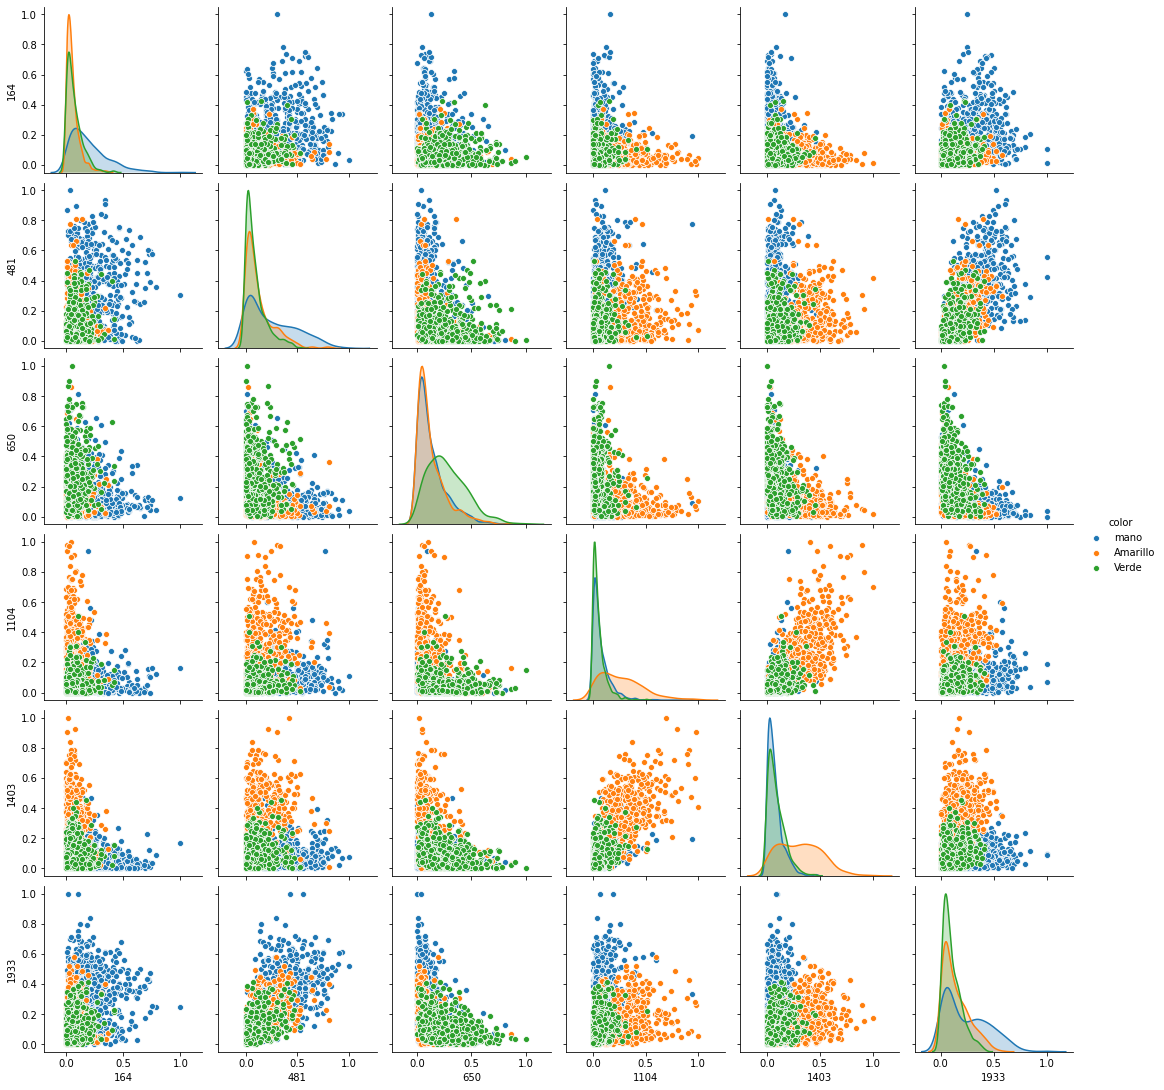

In [ ]:
sns.pairplot(data, vars = selected_features, hue="color", hue_order=["mano", "Amarillo", "Verde"])

Se puede distinguir aquellas features que toman valores diferenciados según el color, como la *650* que como vimos distingue al color verde. Veamos también
que la *164* y la *481* tienen una media distinta para datos color *mano*.

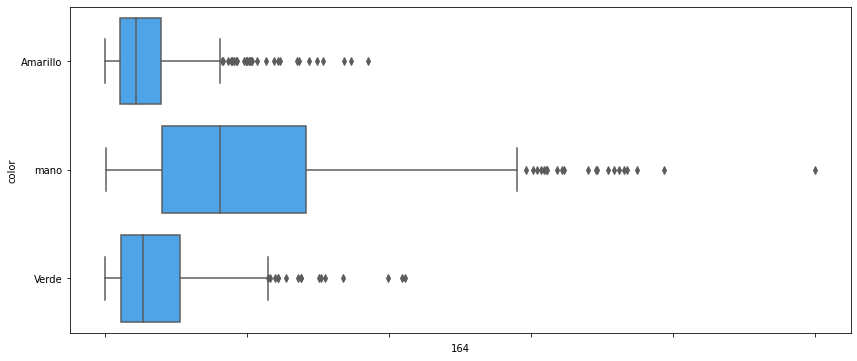

In [ ]:
fig = plt.figure(figsize=(14, 6))
sp1 = plt.subplot('111')
sns.boxplot(data=data, x='164', y='color', color='#35A7FF', ax=sp1)
sp1.set_xticklabels(sp1.get_xticklabels(), rotation=90)
plt.show()
fig.tight_layout()


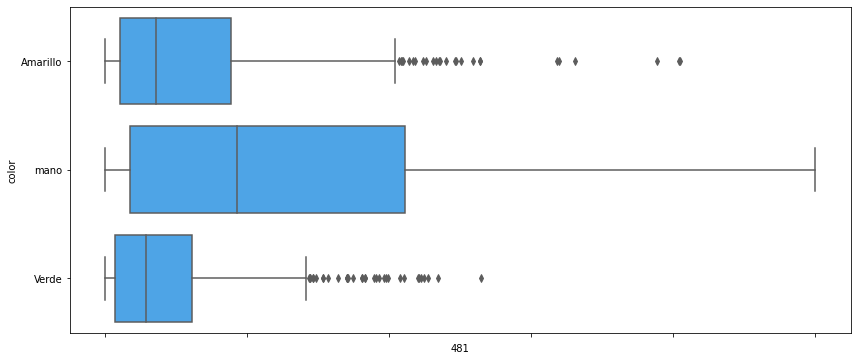

In [ ]:
fig = plt.figure(figsize=(14, 6))
sp1 = plt.subplot('111')
sns.boxplot(data=data, x='481', y='color', color='#35A7FF', ax=sp1)
sp1.set_xticklabels(sp1.get_xticklabels(), rotation=90)
plt.show()
fig.tight_layout()

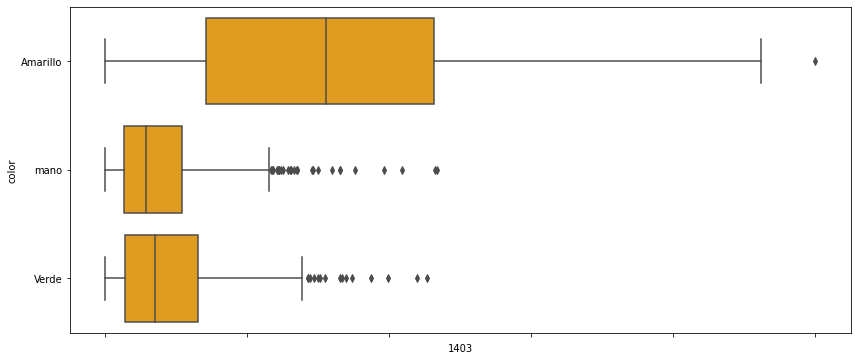

In [ ]:
fig = plt.figure(figsize=(14, 6))
sp1 = plt.subplot('111')
sns.boxplot(data=data, x='1403', y='color', color='orange', ax=sp1)
sp1.set_xticklabels(sp1.get_xticklabels(), rotation=90)
plt.show()
fig.tight_layout()


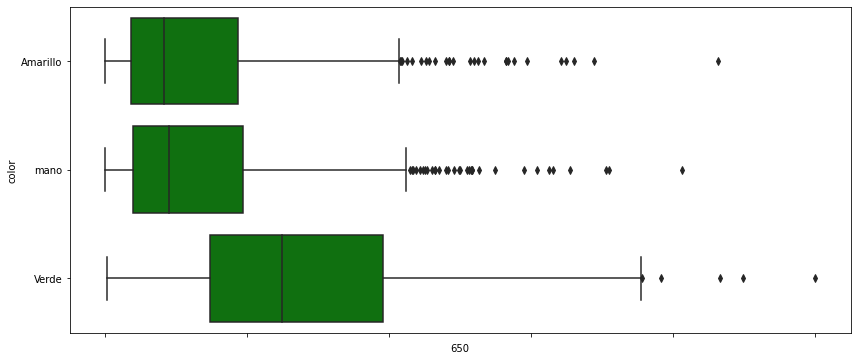

In [ ]:
fig = plt.figure(figsize=(14, 6))
sp1 = plt.subplot('111')
sns.boxplot(data=data, x='650', y='color', color='green', ax=sp1)
sp1.set_xticklabels(sp1.get_xticklabels(), rotation=90)
plt.show()
fig.tight_layout()

Analizamos la distribución de las features, primero diferenciando las imágenes con y sin guantes.

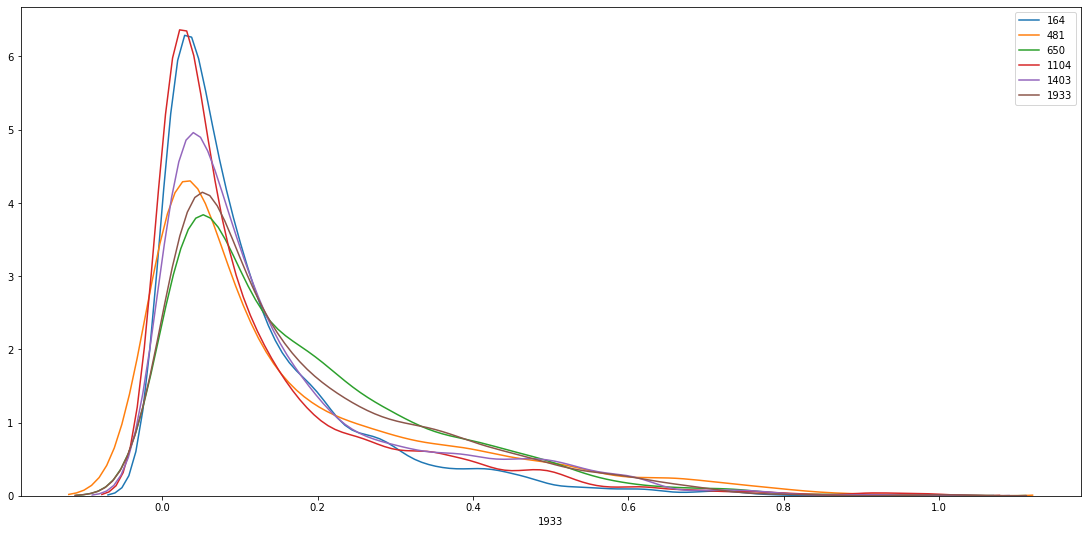

In [ ]:
plt.figure(figsize=(19,9))
for i in selected_features:
    sns.distplot(data[str(i)], label=str(i),  kde=True, hist=False)
plt.legend()

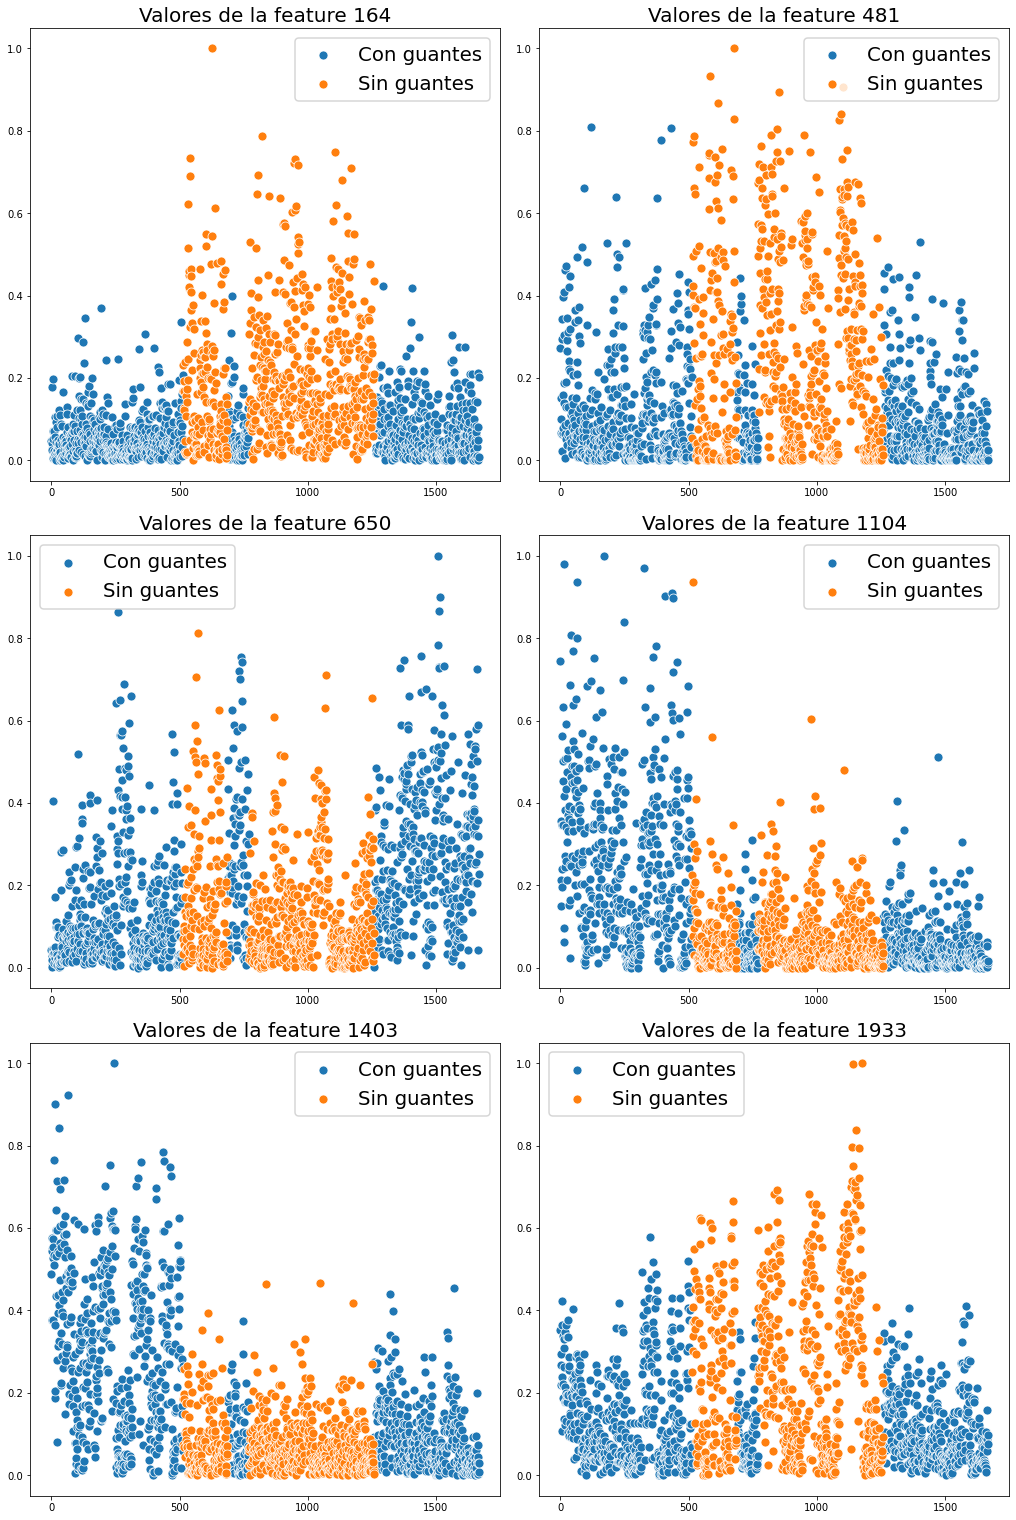

<Figure size 720x432 with 0 Axes>

In [ ]:
def plot_selected_features(dataset):
  coordenadas = selected_features
  num_plots = len(coordenadas)
  total_cols = 2
  total_rows = 3
  fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
  sns.set_context(context='talk', font_scale=1.2)
  plt.figure(figsize=(10,6))
  for i, var in enumerate(coordenadas):   
    row = i//total_cols
    pos = i % total_cols   
    ploti = sns.scatterplot(data=dataset[dataset.guantes == 1][var], ax=axs[row][pos], label="Con guantes")
    sns.scatterplot(data=dataset[dataset.guantes == 0][var], ax=axs[row][pos],label="Sin guantes")
    ploti.axes.set_title("Valores de la feature {}".format(var),fontsize=20)

plot_selected_features(data)

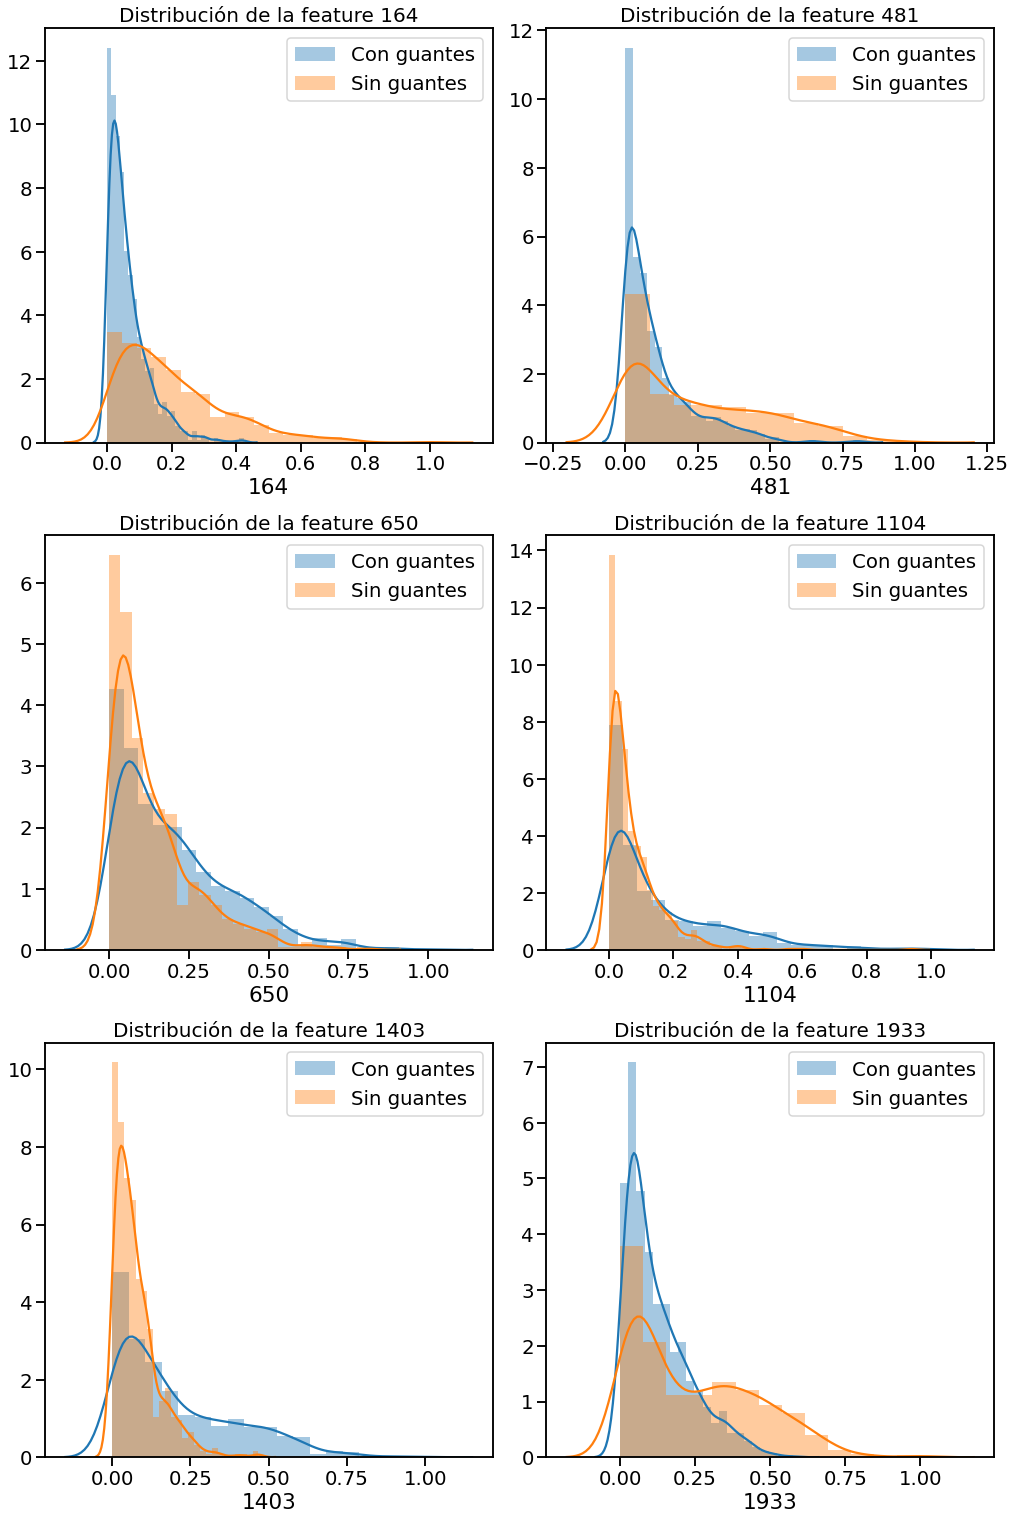

<Figure size 720x432 with 0 Axes>

In [ ]:
def plot_selected_features_dist(dataset):
  coordenadas = selected_features
  num_plots = len(coordenadas)
  total_cols = 2
  total_rows = 3
  fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
  sns.set_context(context='talk', font_scale=1.2)
  plt.figure(figsize=(10,6))
  for i, var in enumerate(coordenadas):   
    row = i//total_cols
    pos = i % total_cols   
    ploti = sns.distplot(dataset[dataset.guantes == 1][var], ax=axs[row][pos], label="Con guantes")
    sns.distplot(dataset[dataset.guantes == 0][var], ax=axs[row][pos],label="Sin guantes")
    ploti.axes.set_title("Distribución de la feature {}".format(var),fontsize=20)
    ploti.legend()

plot_selected_features_dist(data)

Veremos que la distribución de algunas
de las features seleccionadas cambia significativamente
agrupando por el color de las imágenes.

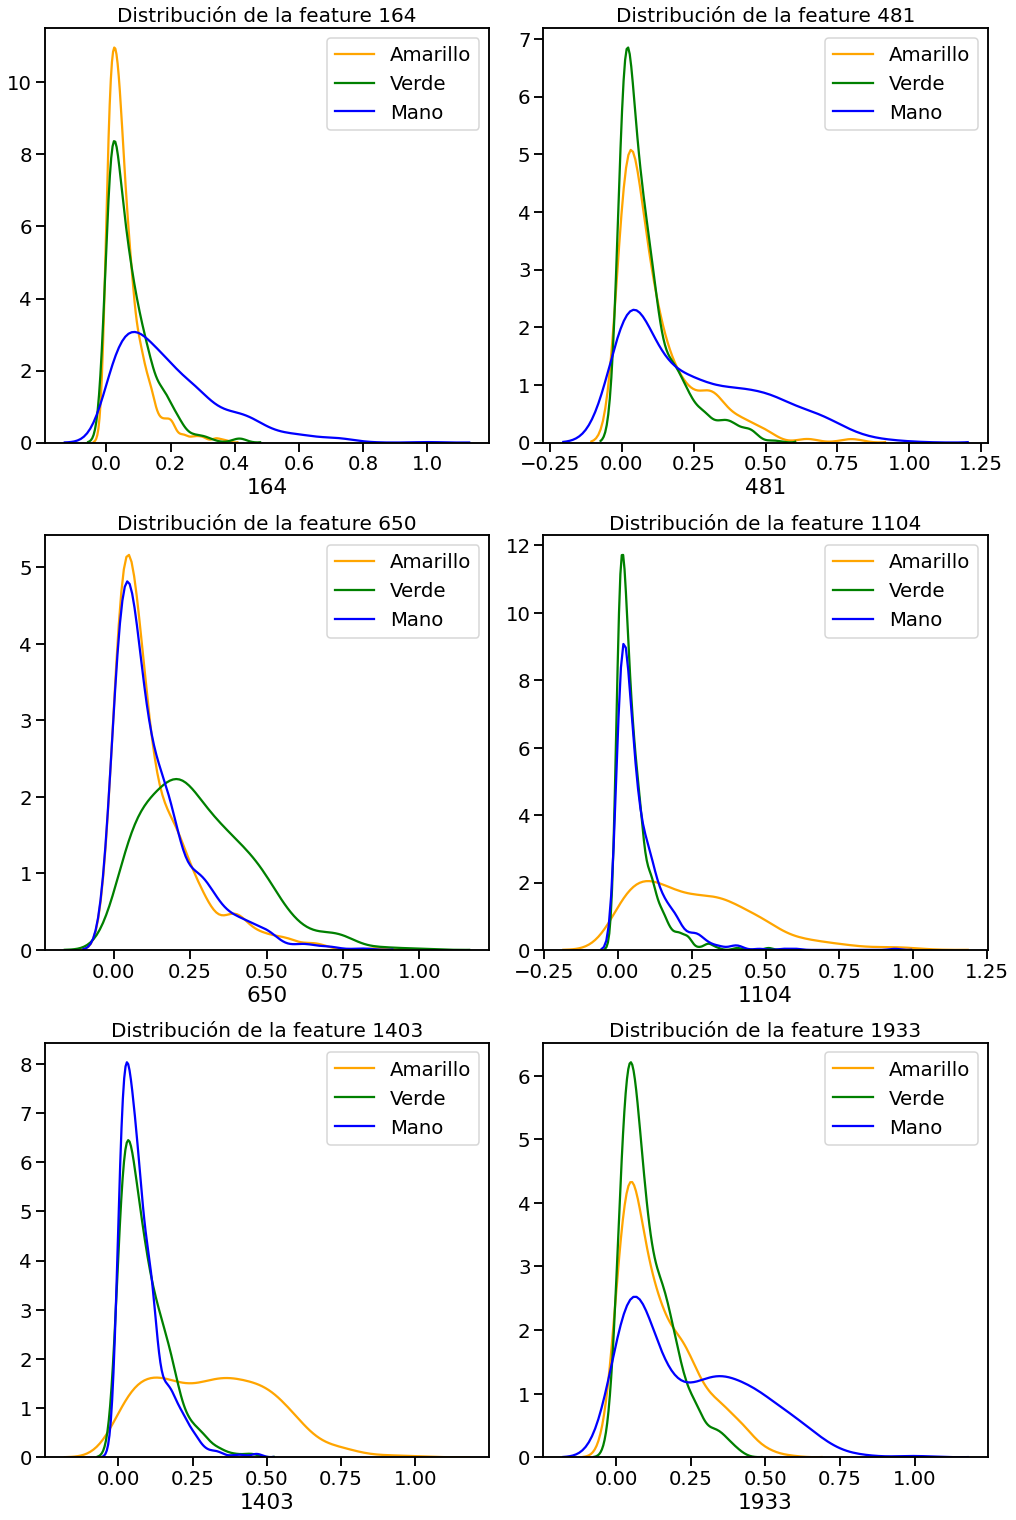

<Figure size 720x432 with 0 Axes>

In [ ]:
def plot_selected_features_dist_color(dataset):
  coordenadas = selected_features
  num_plots = len(coordenadas)
  total_cols = 2
  total_rows = 3
  fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
  sns.set_context(context='talk', font_scale=1.2)
  plt.figure(figsize=(10,6))
  for i, var in enumerate(coordenadas):   
    row = i//total_cols
    pos = i % total_cols   
    ploti = sns.distplot(dataset[dataset.color == "Amarillo"][var], ax=axs[row][pos], label="Amarillo", color="orange", hist=False)
    sns.distplot(dataset[dataset.color == "Verde"][var], ax=axs[row][pos], label="Verde", color="green", hist=False)
    sns.distplot(dataset[dataset.color == "mano"][var], ax=axs[row][pos], label="Mano", color="blue", hist=False)
    ploti.axes.set_title("Distribución de la feature {}".format(var),fontsize=20)
    ploti.legend()
    
plot_selected_features_dist_color(data)

Veamos la distribución distinguiendo el momento del día.

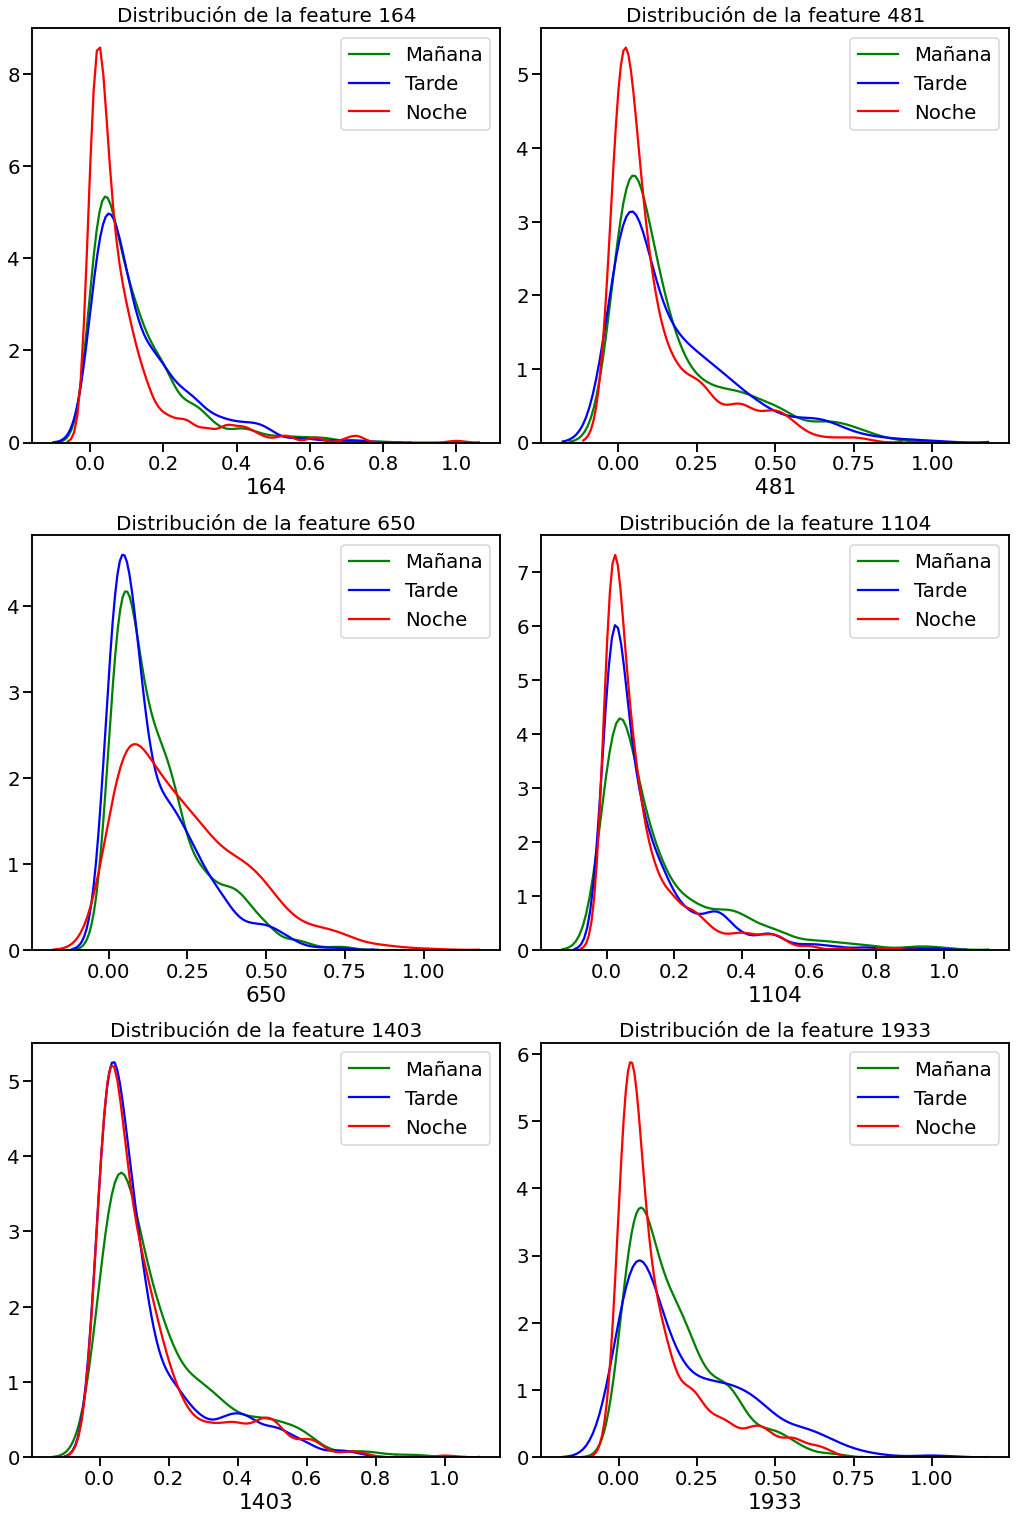

<Figure size 720x432 with 0 Axes>

In [ ]:
def plot_selected_features_dist_time(dataset):
  coordenadas = selected_features
  num_plots = len(coordenadas)
  total_cols = 2
  total_rows = 3
  fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
  sns.set_context(context='talk', font_scale=1.2)
  plt.figure(figsize=(10,6))
  for i, var in enumerate(coordenadas):   
    row = i//total_cols
    pos = i % total_cols   
    ploti = sns.distplot(dataset[dataset.Time == "M"][var], ax=axs[row][pos], label="Mañana", color="green", hist=False)
    sns.distplot(dataset[dataset.Time == "T"][var], ax=axs[row][pos], label="Tarde", color="blue", hist=False)
    sns.distplot(dataset[dataset.Time == "N"][var], ax=axs[row][pos], label="Noche", color="red", hist=False)
    ploti.axes.set_title("Distribución de la feature {}".format(var),fontsize=20)
    ploti.legend()
    
plot_selected_features_dist_time(data)

Si agrupamos por tamaño, también se observa un cambio de la distribución de algunas de las features.

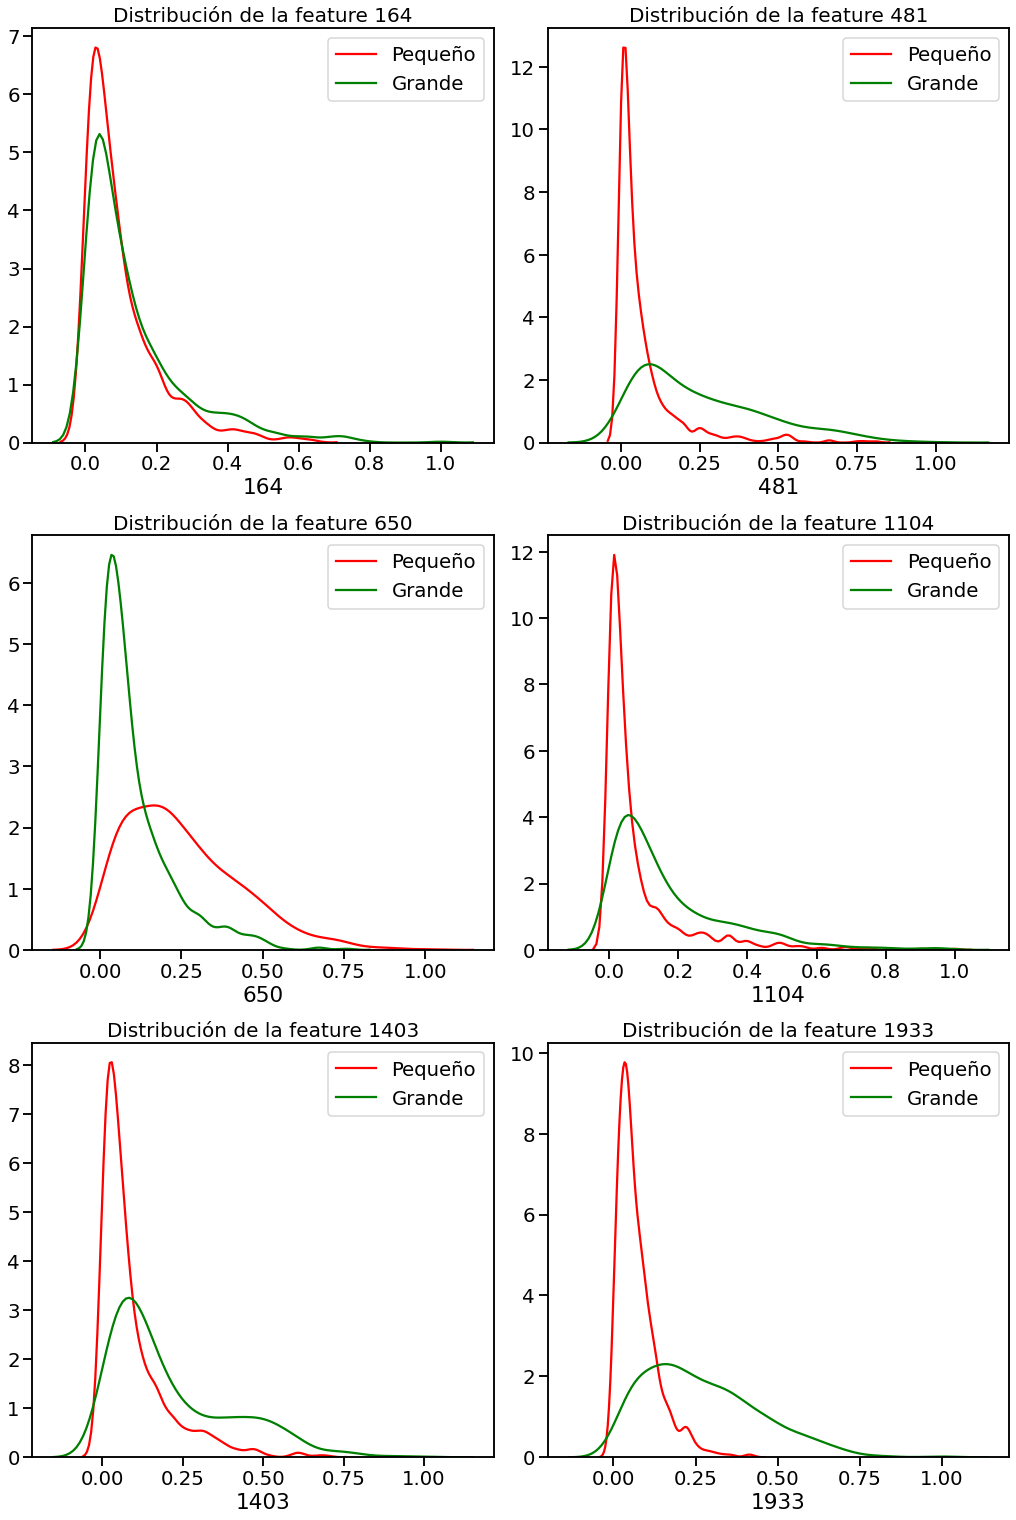

<Figure size 720x432 with 0 Axes>

In [ ]:
def plot_selected_features_dist_size(dataset):
  coordenadas = selected_features
  num_plots = len(coordenadas)
  total_cols = 2
  total_rows = 3
  fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
  sns.set_context(context='talk', font_scale=1.2)
  plt.figure(figsize=(10,6))
  for i, var in enumerate(coordenadas):   
    row = i//total_cols
    pos = i % total_cols   
    ploti = sns.distplot(dataset[dataset.Size == "P"][var], ax=axs[row][pos], label="Pequeño", color="red", hist=False)
    sns.distplot(dataset[dataset.Size == "G"][var], ax=axs[row][pos], label="Grande", color="green", hist=False)
    ploti.axes.set_title("Distribución de la feature {}".format(var),fontsize=20)
    ploti.legend()
    
plot_selected_features_dist_size(data)

La distrubución en cambio no varía significativamente en la muestra *test* vs *train* lo que nos indica que la partición de los datos fue correcta.

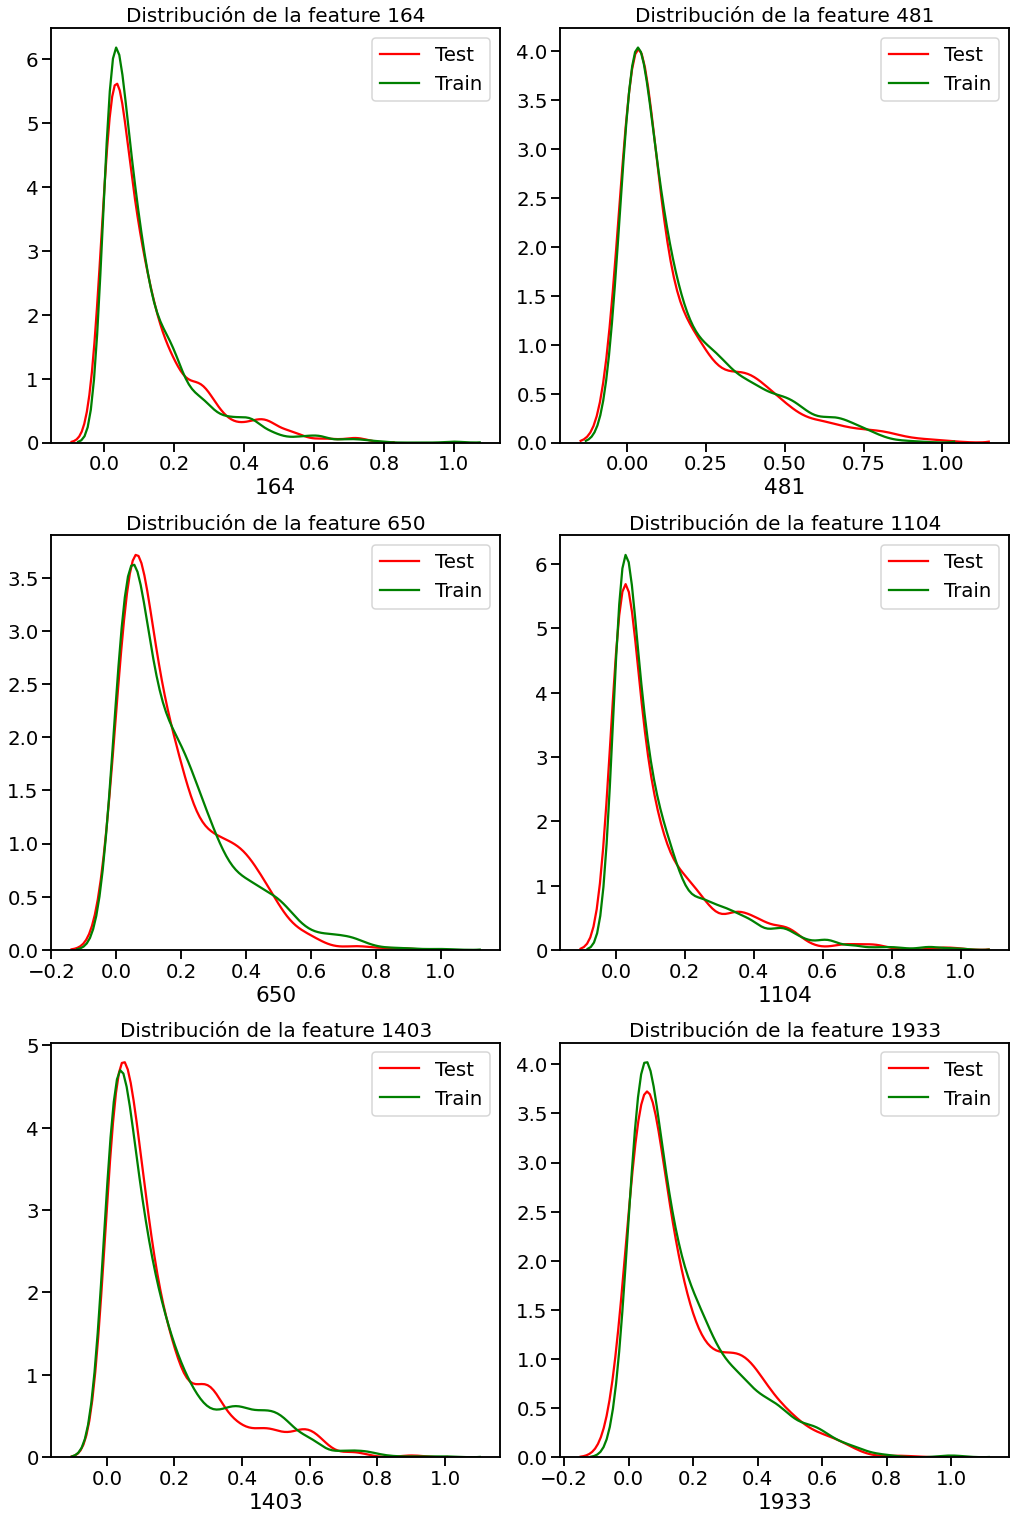

<Figure size 720x432 with 0 Axes>

In [ ]:
def plot_selected_features_dist_type(dataset):
  coordenadas = selected_features
  num_plots = len(coordenadas)
  total_cols = 2
  total_rows = 3
  fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
  sns.set_context(context='talk', font_scale=1.2)
  plt.figure(figsize=(10,6))
  for i, var in enumerate(coordenadas):   
    row = i//total_cols
    pos = i % total_cols   
    ploti = sns.distplot(dataset[dataset.Type == "test"][var], ax=axs[row][pos], label="Test", color="red", hist=False)
    sns.distplot(dataset[dataset.Type == "train"][var], ax=axs[row][pos], label="Train", color="green", hist=False)
    ploti.axes.set_title("Distribución de la feature {}".format(var),fontsize=20)
    ploti.legend()
    
plot_selected_features_dist_type(data)

### Distribución de las features seleccionadas, test de Kolmogorov


In [ ]:
data = sample_ds.copy()
data.guantes = data.guantes.apply(lambda has: 1 if has == "si" else 0)

Vamos a analizar si las distribuciones de los datos de las carácteristicas poseen una distribución normal. Para ello vamos a aplicar el test de *Kolmogorov-Smirnov* a los datos estableciendo un nivel de significancia de 0,05. 

In [ ]:
from sklearn import preprocessing
#selected.index
selected_features = ["164","481", "650", "1104", "1403", "1933"]

#nivel de significancia para los test
nivelSignificancia = 0.05

#función para realizar el test KS a los datos dada las features
#devuelve un dataFrame con los resultados
def testKSofFeatures(featuresList, dataF, alpha=nivelSignificancia):
  ks_tests = []
  for feature in featuresList:
    x     = dataF[feature]
    mu    = np.mean( x )
    std   = np.std( x )
    n     = len( x )
    #test  = [ (y - mu)/(std*np.sqrt(n)) for y in x ]
    #Normalizo
    #x_normalizado = preprocessing.normalize([x])
    x_normalizado = x
    mu    = np.mean( x_normalizado )
    std   = np.std(x_normalizado )
    n     = len( x_normalizado )
    #sns.distplot(x_normalizado, label=feature,  kde=True, hist=False)

    #kolmogorv-s
    s, p  = stats.kstest(x_normalizado,'norm',args=(mu,std))
    
    #s, p  = stats.kstest(x_normalizado,'rayleigh',args=(0,mu))
    #sA, crit, sign = stats.anderson(x_normalizado, 'expon')
    #sN, pN = stats.normaltest(x_normalizado)
    #Aproximo una mezcla de gaussianas
    #gauss_kde    = stats.gaussian_kde(x)

    #Testeo
    #s1, p1 = stats.kstest(x,gauss_kde)
    #print( feature, s1, p1 )
    if p < alpha:
      h0 = 'No es normal'
    else:
      h0 = 'No se rechaza la hipotesis'
    
    ks_tests.append( {
        'Feature': feature,
        'Estadístico    (Distribución Normal)': s,
        'p-valor': p,
        'H0': h0,
        #'Estadistico A': sN,
        #'critico': pN,
        #'significancia': sign,
      #  'Estadístico    (Dist. Gauss. KDE)': s1,
      # "p-valor'": p1,
        'Media': mu,
        'Desviación estándar': std,
        'N': n
    } )
  return pd.DataFrame(ks_tests) 

import statsmodels.api as sm

def plotQQ(featuresList, dataF):
  fig, axs = plt.subplots(nrows=1, ncols=len(featuresList), figsize=(25,5) )
  i=0
  for feature in featuresList:
      x = dataF[feature]
      fig1 = sm.qqplot(x,fit=True, line='45', ax=axs[i], scale=5)
      #tats.probplot(x, plot=axs[i])
      axs[i].set_title(feature)
      axs[i].set_aspect('auto')
      i = i+1
 
  plt.show()

#### Distribución para las **"features"** de ***manos sin guantes***:



In [ ]:
df_manosSinGuantes = testKSofFeatures(selected_features, data[data.guantes == 0])
df_manosSinGuantes

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.108886  ...             0.698160  662
1     481                              0.142101  ...             0.877629  662
2     650                              0.153647  ...             0.710594  662
3    1104                              0.195658  ...             0.208694  662
4    1403                              0.138011  ...             0.304276  662
5    1933                              0.138219  ...             1.148323  662

[6 rows x 7 columns]

Si analizamos los p-valores para cada una de las características y si asumimos un nivel de significancia de 0.05, podemos decir que hay elementos suficientes para rechazar la hipótesis nula de que las distribuciones de los datos provienen de una distribución normal para todas las características.

Ahora vamos a realizar los gráficos Q-Q para ver cuanto se alejan de la distribución normal:

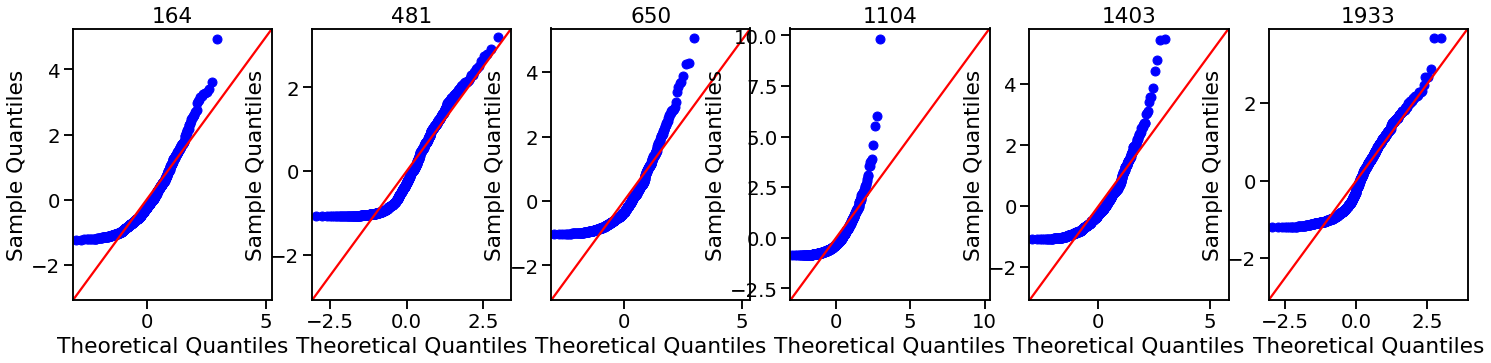

In [ ]:
plotQQ(selected_features, data[data.guantes == 0])

Como predijeron los resultados del K-S test, se puede rechazar la hipotesis 
de que las "features" para ***manos sin guantes*** no provengan de una distribución normal.

#### Distribución para las **"features"** ***con*** ***guantes***:




In [ ]:
df_manosConGuantes = testKSofFeatures(selected_features, data[data.guantes == 1])
df_manosConGuantes

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar     N
0     164                              0.148948  ...             0.275460  1006
1     481                              0.191406  ...             0.463445  1006
2     650                              0.120945  ...             0.920180  1006
3    1104                              0.187340  ...             0.437061  1006
4    1403                              0.144913  ...             0.808910  1006
5    1933                              0.129528  ...             0.596033  1006

[6 rows x 7 columns]

Analizando los resultados de los p-valores podemos decir que se rechaza la hipótesis nula de que los datos provienen de una distribución normal.

Ahora vamos a realizar los gráficos Q-Q para ver cuanto se alejan de la distribución normal:

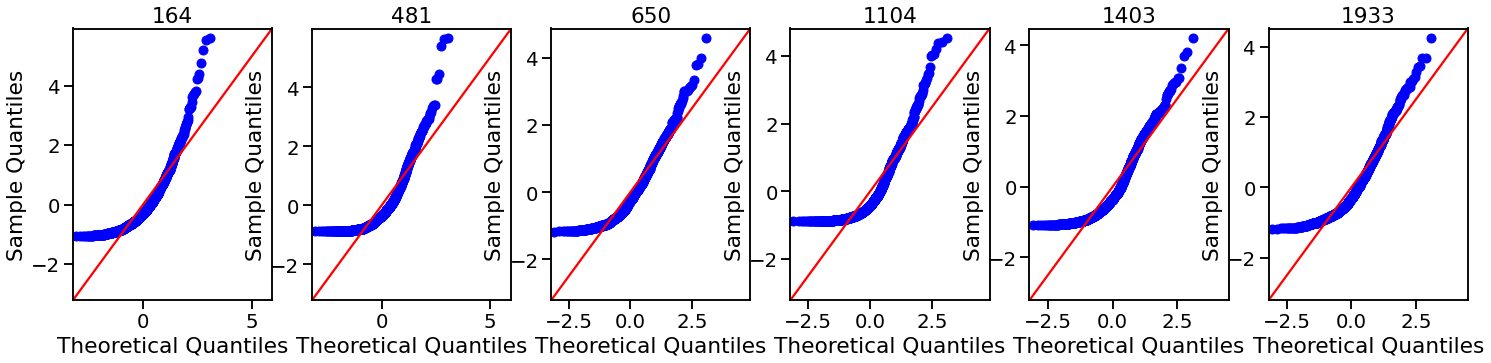

In [ ]:
plotQQ(selected_features, data[data.guantes == 1])

Como predijeron los resultados del K-S test, se puede rechazar la hipotesis de que las "features" para ***manos con guantes*** provengan de una distribución normal.

#### Distribución para las **"features"** con ***guantes amarillos***:




In [ ]:
df_manosConGuantesAmarillos = testKSofFeatures(selected_features, data[data.color == 'Amarillo'])
df_manosConGuantesAmarillos

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.150539  ...             0.247894  514
1     481                              0.186491  ...             0.522741  514
2     650                              0.171311  ...             0.715128  514
3    1104                              0.092728  ...             0.478601  514
4    1403                              0.070593  ...             0.850459  514
5    1933                              0.122775  ...             0.675950  514

[6 rows x 7 columns]

Viendo los resultados de los p-valores podemos ver que para las "features" se puede rechazar la hipotesis nula de que provienen de una distribución normal.

Se puede analizar los gráficos Q-Q para estas "features" y ver cuanto se alejan de una distribución normal.

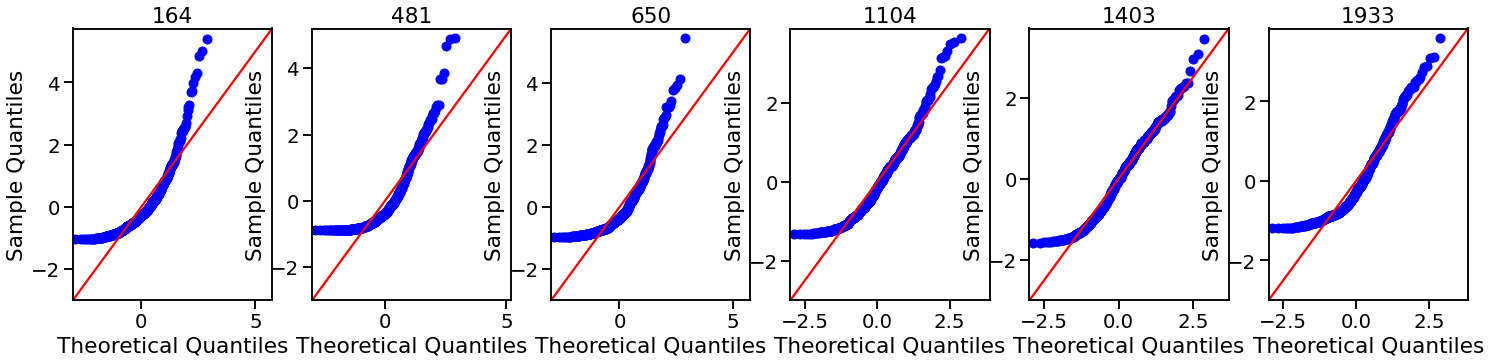

In [ ]:
plotQQ(selected_features, data[data.color == 'Amarillo'])

Como se pudo ver en los resultados del K-S test, las *features* no siguen una distribución normal.

#### Distribución para las **"features"** con ***guantes verdes***:




In [ ]:
df_manosConGuantesVerdes = testKSofFeatures(selected_features, data[data.color == 'Verde'])
df_manosConGuantesVerdes

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.142826  ...             0.298290  492
1     481                              0.186183  ...             0.381675  492
2     650                              0.076682  ...             0.939996  492
3    1104                              0.189630  ...             0.149296  492
4    1403                              0.125354  ...             0.339331  492
5    1933                              0.126406  ...             0.476633  492

[6 rows x 7 columns]

Viendo los resultados de los p-valores podemos ver que para todas las "features" se puede rechazar la hipotesis nula de que provienen de una distribución normal.

Al igual que las "features" de manos con guantes verdes, podemos analizar los gráficos Q-Q:

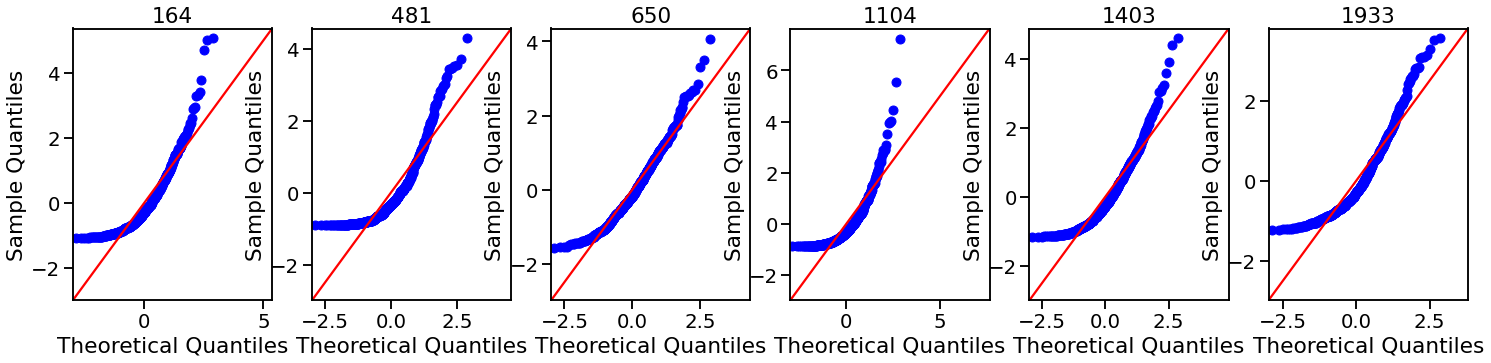

In [ ]:
plotQQ(selected_features, data[data.color == 'Verde'])

Analizando los gráficos se puede corrobar los resultados obtenidos a partir del test K-S, de que las "features" no siguen una distribución normal.

#### Distribución para las **"features"** de ***manos pequeñas sin guantes***:



In [ ]:
df_manosSinGuantesPequeño = testKSofFeatures(selected_features, data[(data.guantes == 0) & (data.Size =='P')])
df_manosSinGuantesPequeño

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.136478  ...             0.582323  304
1     481                              0.254664  ...             0.470776  304
2     650                              0.110352  ...             0.798759  304
3    1104                              0.188800  ...             0.099273  304
4    1403                              0.168374  ...             0.251681  304
5    1933                              0.131695  ...             0.401320  304

[6 rows x 7 columns]

Si analizamos los p-valores para cada una de las características y si asumimos un nivel de significancia de 0.05, podemos decir que hay elementos suficientes para rechazar la hipótesis nula de que las distribuciones de los datos provienen de una distribución normal para todas las características.

Ahora vamos a realizar los gráficos Q-Q para ver cuanto se alejan de la distribución normal:

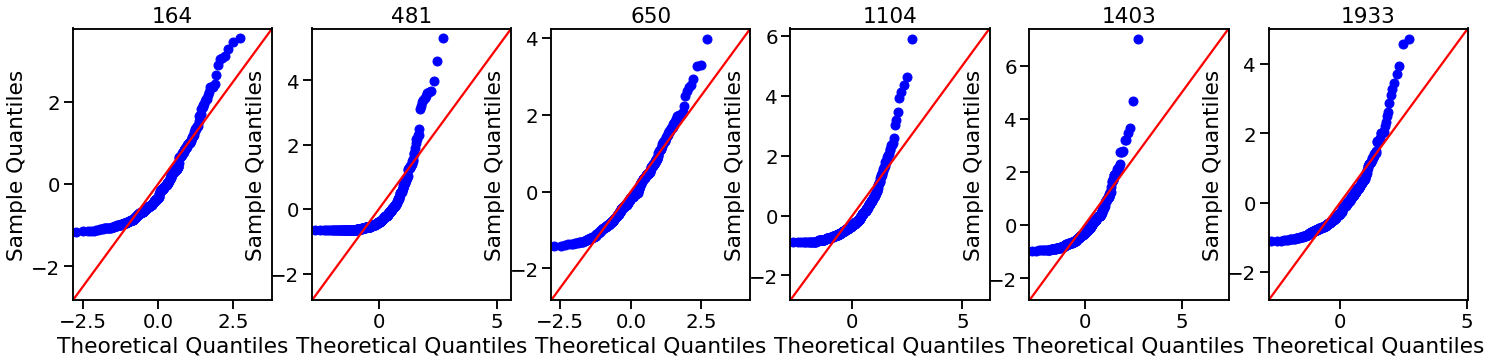

In [ ]:
plotQQ(selected_features, data[(data.guantes == 0) & (data.Size =='P')])

Como predijeron los resultados del K-S test, se puede rechazar la hipotesis 
de que las "features" para ***manos sin guantes*** no provengan de una distribución normal.

#### Distribución para las **"features"** de ***manos grandes sin guantes***:



In [ ]:
df_manosSinGuantesGrande = testKSofFeatures(selected_features, data[(data.guantes == 0) & (data.Size =='G')])
df_manosSinGuantesGrande

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.104837  ...             0.747380  358
1     481                              0.061721  ...             0.783837  358
2     650                              0.148051  ...             0.346400  358
3    1104                              0.145703  ...             0.243058  358
4    1403                              0.112402  ...             0.323706  358
5    1933                              0.022675  ...             0.958762  358

[6 rows x 7 columns]

Si analizamos los p-valores para cada una de las características y si asumimos un nivel de significancia de 0.05, podemos decir que hay elementos suficientes para rechazar la hipótesis nula de que las distribuciones de los datos provienen de una distribución normal para todas las características excepto para la **481** y la **1933**.

Ahora vamos a realizar los gráficos Q-Q para ver cuanto se alejan de la distribución normal:

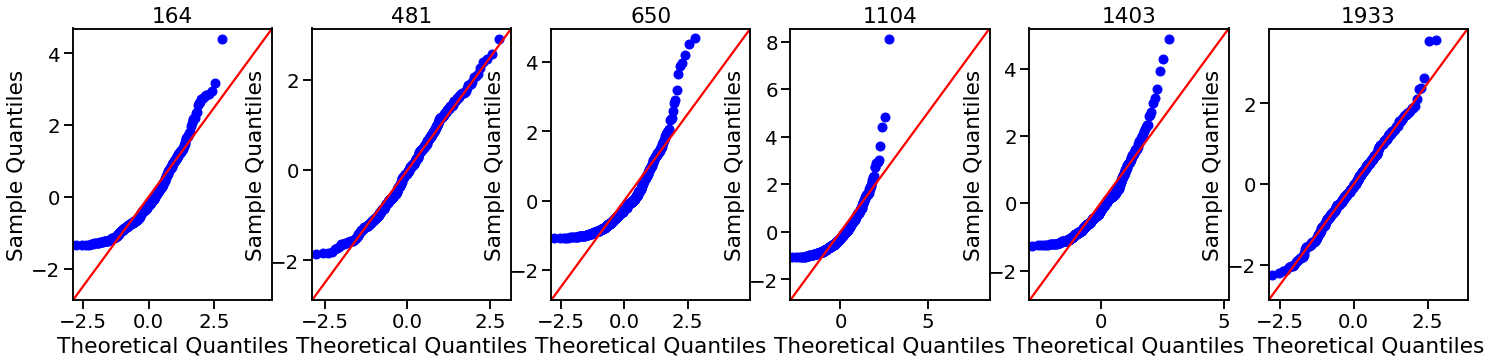

In [ ]:
plotQQ(selected_features, data[(data.guantes == 0) & (data.Size =='G')])

Como predijeron los resultados del K-S test, se puede rechazar la hipotesis 
de que las "features" para ***manos sin guantes*** no provengan de una distribución normal.

#### Distribución para las **"features"** ***con*** ***guantes*** pequeños:




In [ ]:
df_manosConGuantesPequeño = testKSofFeatures(selected_features, data[(data.guantes == 1) & (data.Size =='P')])
df_manosConGuantesPequeño

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.160223  ...             0.286520  492
1     481                              0.274828  ...             0.365287  492
2     650                              0.079168  ...             0.981918  492
3    1104                              0.236272  ...             0.359287  492
4    1403                              0.176649  ...             0.532825  492
5    1933                              0.130324  ...             0.303277  492

[6 rows x 7 columns]

Analizando los resultados de los p-valores podemos decir que se rechaza la hipótesis nula de que los datos provienen de una distribución normal.

Ahora vamos a realizar los gráficos Q-Q para ver cuanto se alejan de la distribución normal:

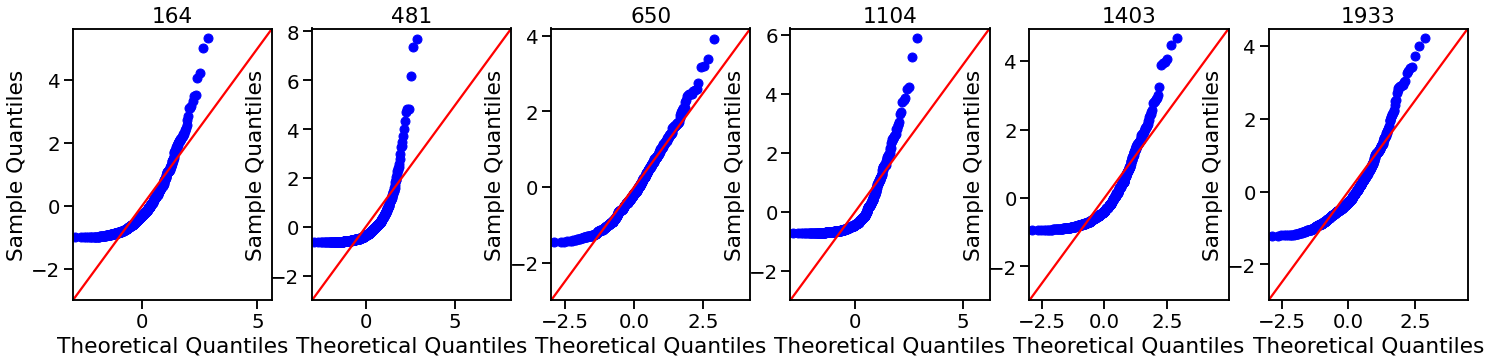

In [ ]:
plotQQ(selected_features, data[(data.guantes == 1) & (data.Size =='P')])

Como predijeron los resultados del K-S test, se puede rechazar la hipotesis de que las "features" para ***manos con guantes pequeños*** provengan de una distribución normal.

#### Distribución para las **"features"** ***con*** ***guantes*** grandes:




In [ ]:
df_manosConGuantesGrande = testKSofFeatures(selected_features, data[(data.guantes == 1) & (data.Size =='G')])
df_manosConGuantesGrande

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.137440  ...             0.264425  514
1     481                              0.135933  ...             0.477378  514
2     650                              0.152893  ...             0.688720  514
3    1104                              0.145455  ...             0.467646  514
4    1403                              0.117197  ...             0.856169  514
5    1933                              0.067337  ...             0.631423  514

[6 rows x 7 columns]

Analizando los resultados de los p-valores podemos decir que se rechaza la hipótesis nula de que los datos provienen de una distribución normal.

Ahora vamos a realizar los gráficos Q-Q para ver cuanto se alejan de la distribución normal:

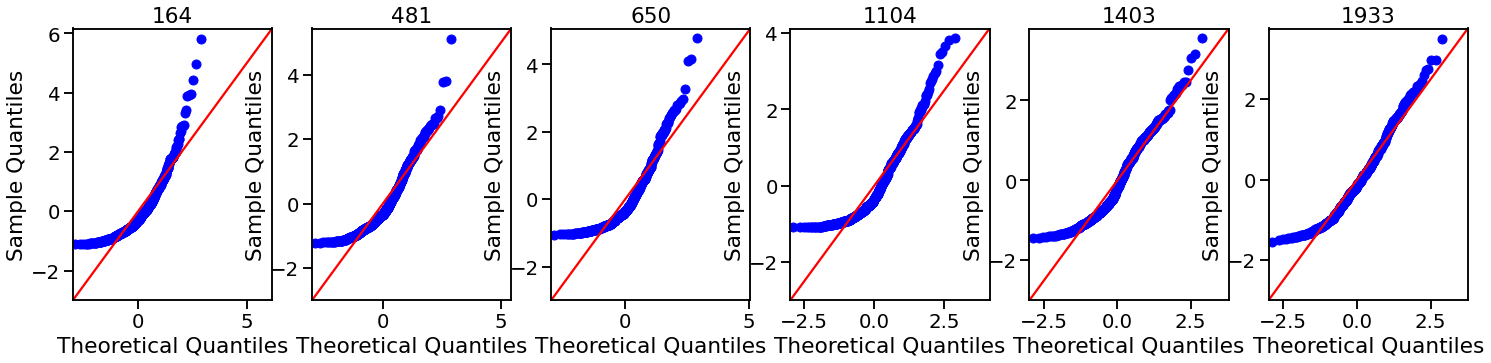

In [ ]:
plotQQ(selected_features, data[(data.guantes == 1) & (data.Size =='G')])

Como predijeron los resultados del K-S test, se puede rechazar la hipotesis de que las "features" para ***manos con guantes grandes*** provengan de una distribución normal.

#### Distribución para las **"features"** de ***manos sin guantes en la mañana***:



In [ ]:
df_manosSinGuantesMañana = testKSofFeatures(selected_features, data[data.guantes == 0 & (data.Time =='M')])
df_manosSinGuantesMañana

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.108886  ...             0.698160  662
1     481                              0.142101  ...             0.877629  662
2     650                              0.153647  ...             0.710594  662
3    1104                              0.195658  ...             0.208694  662
4    1403                              0.138011  ...             0.304276  662
5    1933                              0.138219  ...             1.148323  662

[6 rows x 7 columns]

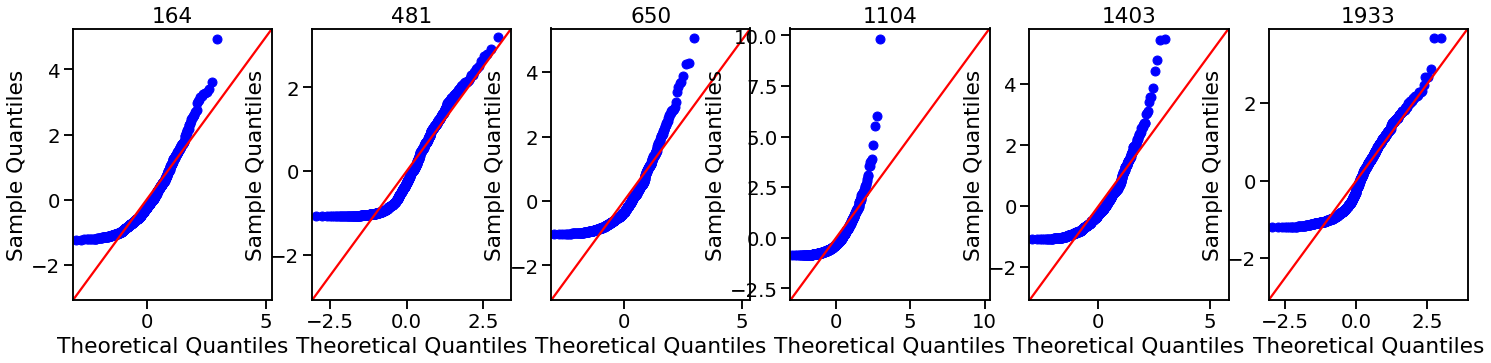

In [ ]:
plotQQ(selected_features, data[data.guantes == 0 & (data.Time =='M')])

#### Distribución para las **"features"** de ***manos sin guantes en la Tarde***:



In [ ]:
df_manosSinGuantesTarde = testKSofFeatures(selected_features, data[data.guantes == 0 & (data.Time =='T')])
df_manosSinGuantesTarde

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.108886  ...             0.698160  662
1     481                              0.142101  ...             0.877629  662
2     650                              0.153647  ...             0.710594  662
3    1104                              0.195658  ...             0.208694  662
4    1403                              0.138011  ...             0.304276  662
5    1933                              0.138219  ...             1.148323  662

[6 rows x 7 columns]

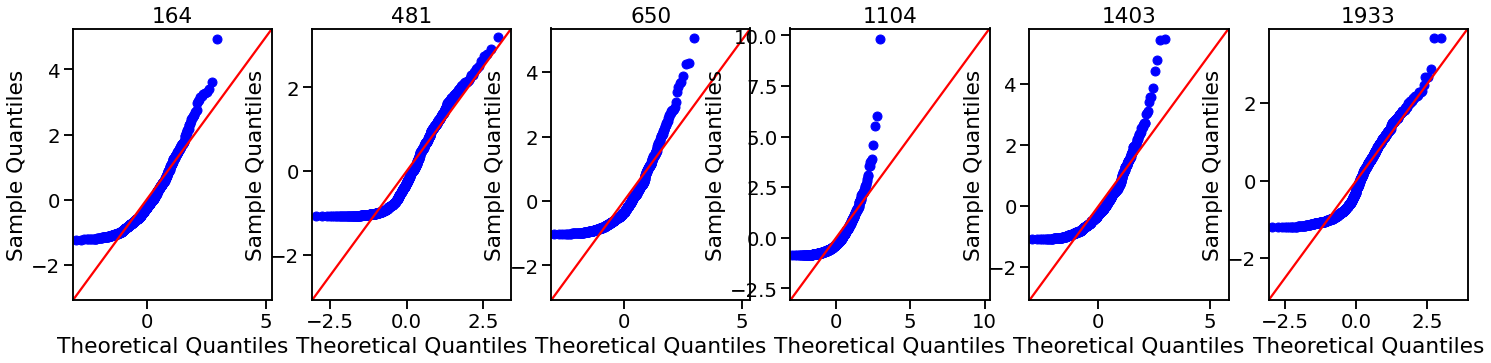

In [ ]:
plotQQ(selected_features, data[data.guantes == 0 & (data.Time =='T')])

#### Distribución para las **"features"** de ***manos sin guantes en la noche***:



In [ ]:
df_manosSinGuantesNoche = testKSofFeatures(selected_features, data[data.guantes == 0 & (data.Time =='N')])
df_manosSinGuantesNoche

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.108886  ...             0.698160  662
1     481                              0.142101  ...             0.877629  662
2     650                              0.153647  ...             0.710594  662
3    1104                              0.195658  ...             0.208694  662
4    1403                              0.138011  ...             0.304276  662
5    1933                              0.138219  ...             1.148323  662

[6 rows x 7 columns]

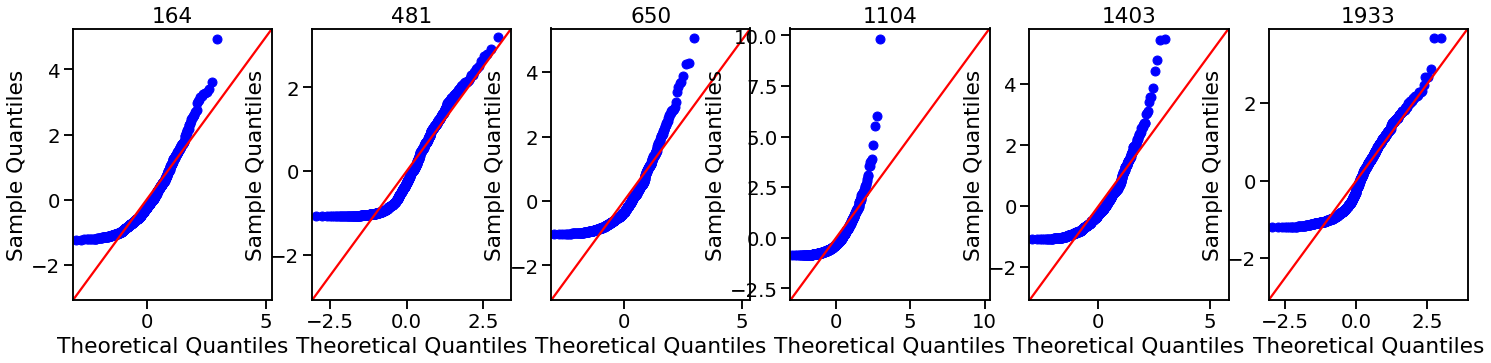

In [ ]:
plotQQ(selected_features, data[data.guantes == 0 & (data.Time =='N')])

#### Distribución para las **"features"** de ***manos con guantes en la mañana***:



In [ ]:
df_manosConGuantesMañana = testKSofFeatures(selected_features, data[data.guantes == 1 & (data.Time =='M')])
df_manosConGuantesMañana

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.161460  ...             0.612045  843
1     481                              0.178038  ...             0.724953  843
2     650                              0.142072  ...             0.771747  843
3    1104                              0.216352  ...             0.399042  843
4    1403                              0.183188  ...             0.692513  843
5    1933                              0.144422  ...             1.005646  843

[6 rows x 7 columns]

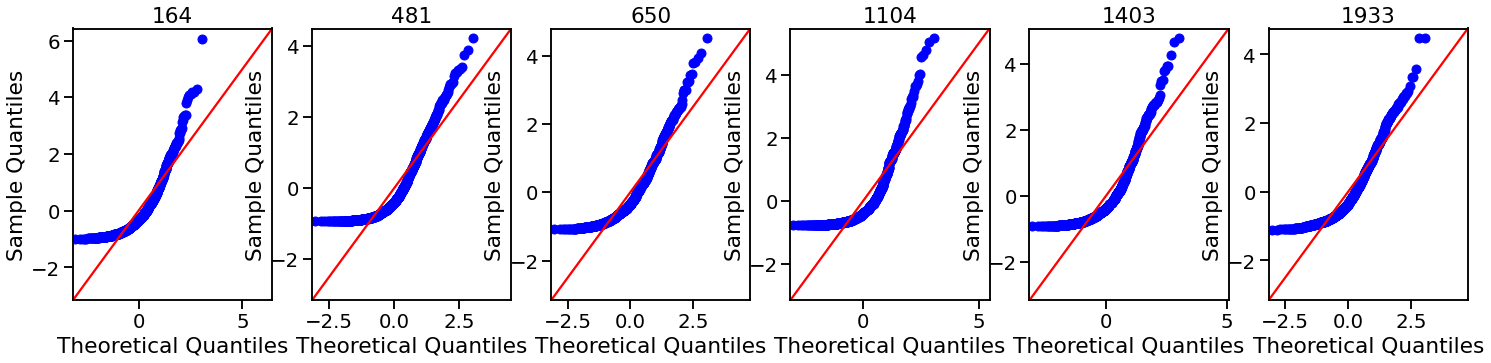

In [ ]:
plotQQ(selected_features, data[data.guantes == 1 & (data.Time =='M')])

#### Distribución para las **"features"** de ***manos con guantes en la tarde***:



In [ ]:
df_manosConGuantesTarde = testKSofFeatures(selected_features, data[data.guantes == 1 & (data.Time =='T')])
df_manosConGuantesTarde

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.162834  ...             0.637588  722
1     481                              0.179634  ...             0.767098  722
2     650                              0.127396  ...             0.767540  722
3    1104                              0.213847  ...             0.329253  722
4    1403                              0.184356  ...             0.596906  722
5    1933                              0.147759  ...             0.949164  722

[6 rows x 7 columns]

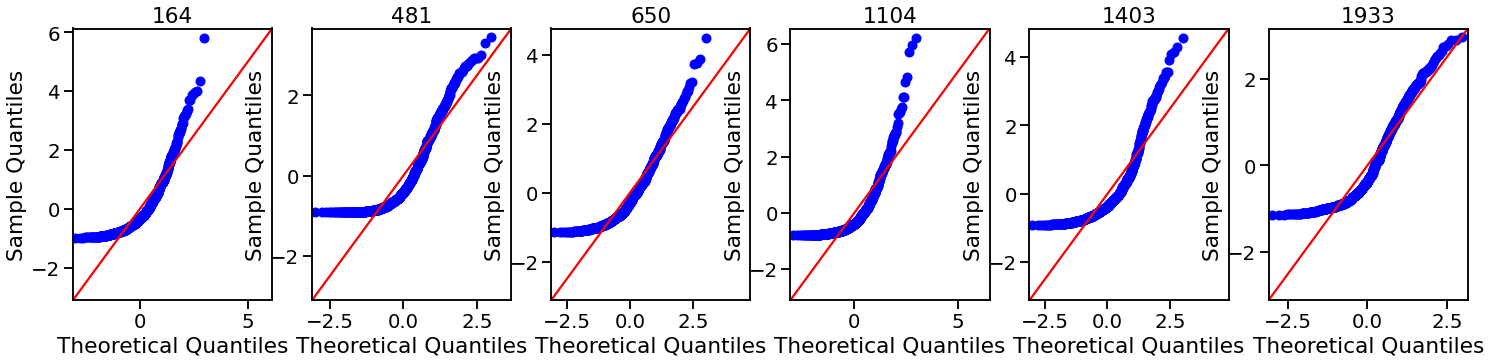

In [ ]:
plotQQ(selected_features, data[data.guantes == 1 & (data.Time =='T')])

#### Distribución para las **"features"** de ***manos con guantes en la noche***:



In [ ]:
df_manosConGuantesNoche = testKSofFeatures(selected_features, data[data.guantes == 1 & (data.Time =='N')])
df_manosConGuantesNoche

Feature  Estadístico    (Distribución Normal)  ...  Desviación estándar    N
0     164                              0.162934  ...             0.632317  765
1     481                              0.181064  ...             0.831300  765
2     650                              0.156261  ...             0.930349  765
3    1104                              0.206172  ...             0.278600  765
4    1403                              0.202121  ...             0.609567  765
5    1933                              0.161005  ...             1.063956  765

[6 rows x 7 columns]

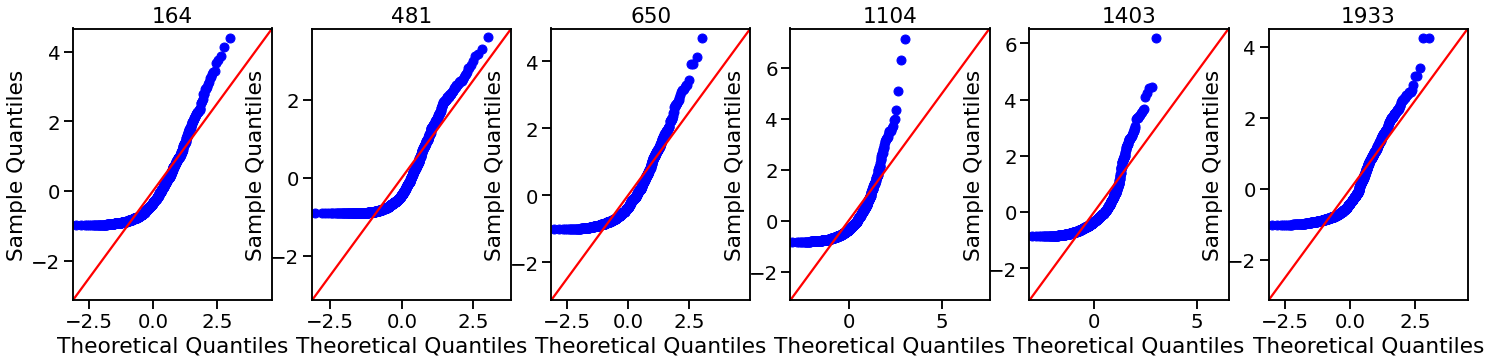

In [ ]:
plotQQ(selected_features, data[data.guantes == 1 & (data.Time =='N')])

### Conclusiones 
A partir de los test realizados al conjunto de dato en diferentes agrupaciones, se puede concluir que las distribuciones de las ***features*** seleccionadas no siguen una distribución normal. 